<a href="https://colab.research.google.com/github/scarletpeony/ProtBert-BFD-disoanno/blob/main/SGH_take_home_test_Soon_Ka_Hui%2C_Debbie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing packages

In [1]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 9.3 MB/s 
     |████████████████████████████████| 6.3 MB 21.3 MB/s 
     |████████████████████████████████| 16.7 MB 15.7 MB/s 


In [2]:
!pip install matplotlib-label-lines

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install pycountry

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.1 MB 4.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=3cce649d1b051c52947b4feb693e334f8428b16f4b98ee9b7453815d0f4bbe66
  Stored in directory: /root/.cache/pip/wheels/0e/06/e8/7ee176e95ea9a8a8c3b3afcb1869f20adbd42413d4611c6eb4
Successfully built pycountry


# Importing dataset

In [5]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
df = pd.read_csv(r"/content/drive/MyDrive/SGH Application/Data.csv")

In [8]:
# Converting Date column to date format.
df['Date']= pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.date

In [9]:
# Creating an index column
id = df.index
df.insert(0, 'id', id)

In [10]:
# Creating variables divided by 1000
df['Cases_per_1000'] = df['Cases'].div(1000)
df['Deaths_per_1000'] = df['Deaths'].div(1000)
df['DailyTests_per_1000'] = df['Daily tests'].div(1000)

In [11]:
# https://melaniesoek0120.medium.com/data-visualization-how-to-plot-a-map-with-geopandas-in-python-73b10dcd4b4b
# generate country code  based on country name for creating world maps in later section
import pycountry 
def alpha3code(column):
    CODE=[]
    for country in column:
        try:
            code=pycountry.countries.get(name=country).alpha_3
           # .alpha_3 means 3-letter country code 
           # .alpha_2 means 2-letter country code
            CODE.append(code)
        except:
            CODE.append('None')
    return CODE
# create a column for code 
code = alpha3code(df.Entity)
df.insert(1, 'CODE', code)

In [12]:
df.head()

id CODE   Entity Continent  Latitude  Longitude  \
0   0  ALB  Albania    Europe     41.15      20.17   
1   1  ALB  Albania    Europe     41.15      20.17   
2   2  ALB  Albania    Europe     41.15      20.17   
3   3  ALB  Albania    Europe     41.15      20.17   
4   4  ALB  Albania    Europe     41.15      20.17   

   Average temperature per year  Hospital beds per 1000 people  \
0                            14                           2.89   
1                            14                           2.89   
2                            14                           2.89   
3                            14                           2.89   
4                            14                           2.89   

   Medical doctors per 1000 people  GDP/Capita  Population  Median age  \
0                             1.29      5353.2     2873457          38   
1                             1.29      5353.2     2873457          38   
2                             1.29      5353.2     2873457          38   
3                             1.29      5353.2     2873457          38   
4                             1.29      5353.2     2873457          38   

   Population aged 65 and over (%)        Date  Daily tests  Cases  Deaths  \
0                               14  2020-02-25          8.0    NaN     NaN   
1                               14  2020-02-26          5.0    NaN     NaN   
2                               14  2020-02-27          4.0    NaN     NaN   
3                               14  2020-02-28          1.0    NaN     NaN   
4                               14  2020-02-29          8.0    NaN     NaN   

   Cases_per_1000  Deaths_per_1000  DailyTests_per_1000  
0             NaN              NaN                0.008  
1             NaN              NaN                0.005  
2             NaN              NaN                0.004  
3             NaN              NaN                0.001  
4             NaN              NaN                0.008

In [13]:
df.describe()

id      Latitude     Longitude  Average temperature per year  \
count  38472.000000  38472.000000  38472.000000                  38472.000000   
mean   19235.500000     23.737060     20.210847                     17.717145   
std    11106.054115     26.060413     61.074922                      8.134926   
min        0.000000    -40.900000   -106.350000                     -2.000000   
25%     9617.750000      8.620000     -3.440000                     11.000000   
50%    19235.500000     27.510000     21.820000                     20.000000   
75%    28853.250000     45.940000     47.480000                     25.000000   
max    38471.000000     64.960000    179.410000                     29.000000   

       Hospital beds per 1000 people  Medical doctors per 1000 people  \
count                   38472.000000                     38472.000000   
mean                        3.165305                         2.086313   
std                         2.561767                         1.518252   
min                         0.200000                         0.020000   
25%                         1.400000                         0.820000   
50%                         2.500000                         1.890000   
75%                         4.490000                         3.210000   
max                        13.050000                         7.520000   

          GDP/Capita    Population    Median age  \
count   38472.000000  3.847200e+04  38472.000000   
mean    19002.331415  4.896983e+07     32.751508   
std     22271.107786  1.427251e+08      8.472305   
min       411.600000  3.412840e+05     16.000000   
25%      3659.000000  4.793900e+06     27.000000   
50%      8821.800000  1.148464e+07     32.000000   
75%     25946.200000  4.286296e+07     41.000000   
max    114704.600000  1.339180e+09     48.000000   

       Population aged 65 and over (%)   Daily tests         Cases  \
count                     38472.000000  3.057700e+04  3.821800e+04   
mean                         10.663392  3.944059e+04  2.879027e+05   
std                           6.770417  1.501847e+05  1.405243e+06   
min                           1.000000 -2.391720e+05  1.000000e+00   
25%                           5.000000  1.505000e+03  2.074000e+03   
50%                           8.000000  5.520000e+03  2.143100e+04   
75%                          16.000000  2.038200e+04  1.373770e+05   
max                          28.000000  2.945871e+06  2.860567e+07   

              Deaths  Cases_per_1000  Deaths_per_1000  DailyTests_per_1000  
count   34862.000000    38218.000000     34862.000000         30577.000000  
mean     8090.504733      287.902657         8.090505            39.440594  
std     29548.753221     1405.242872        29.548753           150.184660  
min         1.000000        0.001000         0.001000          -239.172000  
25%        77.000000        2.074000         0.077000             1.505000  
50%       527.000000       21.431000         0.527000             5.520000  
75%      3480.500000      137.377000         3.480500            20.382000  
max    513091.000000    28605.669000       513.091000          2945.871000

In [20]:
# Creating tests pivot table in pandas as there is no PIVOT function in SQLite
dftests = df[['Date','Entity','DailyTests_per_1000']]
dftests_T = df.pivot('Date', 'Entity', 'DailyTests_per_1000')

In [21]:
# Filtering for countries with greater than 250,000 tests a day
filtertests = (dftests_T>250).any()
dftests_T_sub = dftests_T.loc[: , filtertests]

In [40]:
dftests_T_sub.head()

Entity      Austria  Canada  France  India  Italy  Poland  Russia  Slovakia  \
Date                                                                          
2020-01-01      NaN     NaN     NaN    NaN    NaN     NaN     NaN       NaN   
2020-01-02      NaN     NaN     NaN    NaN    NaN     NaN     NaN       NaN   
2020-01-03      NaN     NaN     NaN    NaN    NaN     NaN     NaN       NaN   
2020-01-04      NaN     NaN     NaN    NaN    NaN     NaN     NaN       NaN   
2020-01-05      NaN     NaN     NaN    NaN    NaN     NaN     NaN       NaN   

Entity      United Kingdom  United States  
Date                                       
2020-01-01             NaN            NaN  
2020-01-02             NaN            NaN  
2020-01-03             NaN            NaN  
2020-01-04             NaN            NaN  
2020-01-05             NaN            NaN

In [17]:
# Creating cases pivot table in pandas as there is no PIVOT function in SQLite
dfcases = df[['Date','Entity','Cases_per_1000']]
dfcases_T = df.pivot('Date', 'Entity', 'Cases_per_1000')


In [18]:
# Filtering for countries with greater than 500,000 cases a day
filtercases = (dfcases_T>500).any()
dfcases_T_sub = dfcases_T.loc[: , filtercases]

In [41]:
dfcases_T_sub.head()

Entity      Argentina  Bangladesh  Belgium  Canada  Chile  Colombia  France  \
Date                                                                          
2020-01-01        NaN         NaN      NaN     NaN    NaN       NaN     NaN   
2020-01-02        NaN         NaN      NaN     NaN    NaN       NaN     NaN   
2020-01-03        NaN         NaN      NaN     NaN    NaN       NaN     NaN   
2020-01-04        NaN         NaN      NaN     NaN    NaN       NaN     NaN   
2020-01-05        NaN         NaN      NaN     NaN    NaN       NaN     NaN   

Entity      India  Indonesia  Iran  ...  Portugal  Romania  Russia  \
Date                                ...                              
2020-01-01    NaN        NaN   NaN  ...       NaN      NaN     NaN   
2020-01-02    NaN        NaN   NaN  ...       NaN      NaN     NaN   
2020-01-03    NaN        NaN   NaN  ...       NaN      NaN     NaN   
2020-01-04    NaN        NaN   NaN  ...       NaN      NaN     NaN   
2020-01-05    NaN        NaN   NaN  ...       NaN      NaN     NaN   

Entity      South Africa  Sweden  Switzerland  Turkey  Ukraine  \
Date                                                             
2020-01-01           NaN     NaN          NaN     NaN      NaN   
2020-01-02           NaN     NaN          NaN     NaN      NaN   
2020-01-03           NaN     NaN          NaN     NaN      NaN   
2020-01-04           NaN     NaN          NaN     NaN      NaN   
2020-01-05           NaN     NaN          NaN     NaN      NaN   

Entity      United Kingdom  United States  
Date                                       
2020-01-01             NaN            NaN  
2020-01-02             NaN            NaN  
2020-01-03             NaN            NaN  
2020-01-04             NaN            NaN  
2020-01-05             NaN            NaN  

[5 rows x 28 columns]

In [14]:
# Creating deaths pivot table in pandas as there is no PIVOT function in SQLite
dfdeaths = df[['Date','Entity','Deaths_per_1000']]
dfdeaths_T = df.pivot('Date', 'Entity', 'Deaths_per_1000')

In [15]:
# Filtering for countries with greater than 50,000 deaths a day
filterdeaths = (dfdeaths_T>50).any()
dfdeaths_T_sub = dfdeaths_T.loc[: , filterdeaths]

In [38]:
dfdeaths_T_sub.head()

Entity      Argentina  Colombia  France  India  Iran  Italy  Mexico  Russia  \
Date                                                                          
2020-01-01        NaN       NaN     NaN    NaN   NaN    NaN     NaN     NaN   
2020-01-02        NaN       NaN     NaN    NaN   NaN    NaN     NaN     NaN   
2020-01-03        NaN       NaN     NaN    NaN   NaN    NaN     NaN     NaN   
2020-01-04        NaN       NaN     NaN    NaN   NaN    NaN     NaN     NaN   
2020-01-05        NaN       NaN     NaN    NaN   NaN    NaN     NaN     NaN   

Entity      United Kingdom  United States  
Date                                       
2020-01-01             NaN            NaN  
2020-01-02             NaN            NaN  
2020-01-03             NaN            NaN  
2020-01-04             NaN            NaN  
2020-01-05             NaN            NaN

## Creating normalised tables in SQLite

In [44]:
# Creating country table with country specific information
countrydf = df
countrydf = countrydf.drop(['Date', 'Daily tests', 'Cases', 'Deaths', 'Cases_per_1000', 'Deaths_per_1000', 'DailyTests_per_1000'], axis = 1)
countrydf.head()

id CODE   Entity Continent  Latitude  Longitude  \
0   0  ALB  Albania    Europe     41.15      20.17   
1   1  ALB  Albania    Europe     41.15      20.17   
2   2  ALB  Albania    Europe     41.15      20.17   
3   3  ALB  Albania    Europe     41.15      20.17   
4   4  ALB  Albania    Europe     41.15      20.17   

   Average temperature per year  Hospital beds per 1000 people  \
0                            14                           2.89   
1                            14                           2.89   
2                            14                           2.89   
3                            14                           2.89   
4                            14                           2.89   

   Medical doctors per 1000 people  GDP/Capita  Population  Median age  \
0                             1.29      5353.2     2873457          38   
1                             1.29      5353.2     2873457          38   
2                             1.29      5353.2     2873457          38   
3                             1.29      5353.2     2873457          38   
4                             1.29      5353.2     2873457          38   

   Population aged 65 and over (%)  
0                               14  
1                               14  
2                               14  
3                               14  
4                               14

In [43]:
# Creating daily table with daily data
dailydf = df[['id', 'CODE','Entity', 'Continent', 'Date', 'Daily tests', 'DailyTests_per_1000', 'Cases', 'Cases_per_1000', 'Deaths', 'Deaths_per_1000']]
dailydf.head()

id CODE   Entity Continent        Date  Daily tests  DailyTests_per_1000  \
0   0  ALB  Albania    Europe  2020-02-25          8.0                0.008   
1   1  ALB  Albania    Europe  2020-02-26          5.0                0.005   
2   2  ALB  Albania    Europe  2020-02-27          4.0                0.004   
3   3  ALB  Albania    Europe  2020-02-28          1.0                0.001   
4   4  ALB  Albania    Europe  2020-02-29          8.0                0.008   

   Cases  Cases_per_1000  Deaths  Deaths_per_1000  
0    NaN             NaN     NaN              NaN  
1    NaN             NaN     NaN              NaN  
2    NaN             NaN     NaN              NaN  
3    NaN             NaN     NaN              NaN  
4    NaN             NaN     NaN              NaN

In [45]:
# Connect to a database
conn = sqlite3.connect('covid-19.db')
# Create a cursor
c = conn.cursor()

In [46]:
# Read datasets into SQL
countrydf.to_sql("country", conn, if_exists = "replace", index = False)
dailydf.to_sql("daily", conn, if_exists = "replace", index = False)
dfdeaths_T.to_sql("deaths", conn, if_exists = "replace", index = True)
dfdeaths_T_sub.to_sql("deaths_sub", conn, if_exists = "replace", index = True)
dfcases_T.to_sql("cases", conn, if_exists = "replace", index = True)
dfcases_T_sub.to_sql("cases_sub", conn, if_exists = "replace", index = True)
dftests_T.to_sql("tests", conn, if_exists = "replace", index = True)
dftests_T_sub.to_sql("tests_sub", conn, if_exists = "replace", index = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:2882: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


In [47]:
# Read data tables in SQL
countryread = """ SELECT * FROM country"""
dailyread = """ SELECT * FROM daily"""
deathsread = """ SELECT * FROM deaths"""
deathsread_sub = """ SELECT * FROM deaths_sub"""
casesread = """ SELECT * FROM cases"""
casesread_sub = """ SELECT * FROM cases_sub"""
testsread = """ SELECT * FROM tests"""
testsread_sub = """ SELECT * FROM tests_sub"""

In [50]:
pd.read_sql(countryread, conn)

id CODE    Entity Continent  Latitude  Longitude  \
0          0  ALB   Albania    Europe     41.15      20.17   
1          1  ALB   Albania    Europe     41.15      20.17   
2          2  ALB   Albania    Europe     41.15      20.17   
3          3  ALB   Albania    Europe     41.15      20.17   
4          4  ALB   Albania    Europe     41.15      20.17   
...      ...  ...       ...       ...       ...        ...   
38467  38467  ZWE  Zimbabwe    Africa    -19.02      29.15   
38468  38468  ZWE  Zimbabwe    Africa    -19.02      29.15   
38469  38469  ZWE  Zimbabwe    Africa    -19.02      29.15   
38470  38470  ZWE  Zimbabwe    Africa    -19.02      29.15   
38471  38471  ZWE  Zimbabwe    Africa    -19.02      29.15   

       Average temperature per year  Hospital beds per 1000 people  \
0                                14                           2.89   
1                                14                           2.89   
2                                14                           2.89   
3                                14                           2.89   
4                                14                           2.89   
...                             ...                            ...   
38467                            20                           1.70   
38468                            20                           1.70   
38469                            20                           1.70   
38470                            20                           1.70   
38471                            20                           1.70   

       Medical doctors per 1000 people  GDP/Capita  Population  Median age  \
0                                 1.29      5353.2     2873457          38   
1                                 1.29      5353.2     2873457          38   
2                                 1.29      5353.2     2873457          38   
3                                 1.29      5353.2     2873457          38   
4                                 1.29      5353.2     2873457          38   
...                                ...         ...         ...         ...   
38467                             0.08      1464.0    16529904          19   
38468                             0.08      1464.0    16529904          19   
38469                             0.08      1464.0    16529904          19   
38470                             0.08      1464.0    16529904          19   
38471                             0.08      1464.0    16529904          19   

       Population aged 65 and over (%)  
0                                   14  
1                                   14  
2                                   14  
3                                   14  
4                                   14  
...                                ...  
38467                                3  
38468                                3  
38469                                3  
38470                                3  
38471                                3  

[38472 rows x 13 columns]

In [51]:
pd.read_sql(dailyread, conn)

id CODE    Entity Continent        Date  Daily tests  \
0          0  ALB   Albania    Europe  2020-02-25          8.0   
1          1  ALB   Albania    Europe  2020-02-26          5.0   
2          2  ALB   Albania    Europe  2020-02-27          4.0   
3          3  ALB   Albania    Europe  2020-02-28          1.0   
4          4  ALB   Albania    Europe  2020-02-29          8.0   
...      ...  ...       ...       ...         ...          ...   
38467  38467  ZWE  Zimbabwe    Africa  2021-02-24       1804.0   
38468  38468  ZWE  Zimbabwe    Africa  2021-02-25       2965.0   
38469  38469  ZWE  Zimbabwe    Africa  2021-02-26          NaN   
38470  38470  ZWE  Zimbabwe    Africa  2021-02-27          NaN   
38471  38471  ZWE  Zimbabwe    Africa  2021-02-28          NaN   

       DailyTests_per_1000    Cases  Cases_per_1000  Deaths  Deaths_per_1000  
0                    0.008      NaN             NaN     NaN              NaN  
1                    0.005      NaN             NaN     NaN              NaN  
2                    0.004      NaN             NaN     NaN              NaN  
3                    0.001      NaN             NaN     NaN              NaN  
4                    0.008      NaN             NaN     NaN              NaN  
...                    ...      ...             ...     ...              ...  
38467                1.804  35960.0          35.960  1456.0            1.456  
38468                2.965  35994.0          35.994  1458.0            1.458  
38469                  NaN  36044.0          36.044  1463.0            1.463  
38470                  NaN  36058.0          36.058  1463.0            1.463  
38471                  NaN  36089.0          36.089  1463.0            1.463  

[38472 rows x 11 columns]

In [52]:
pd.read_sql(deathsread, conn)

Date  Albania  Algeria  Argentina  Armenia  Australia  Austria  \
0    2020-01-01      NaN      NaN        NaN      NaN        NaN      NaN   
1    2020-01-02      NaN      NaN        NaN      NaN        NaN      NaN   
2    2020-01-03      NaN      NaN        NaN      NaN        NaN      NaN   
3    2020-01-04      NaN      NaN        NaN      NaN        NaN      NaN   
4    2020-01-05      NaN      NaN        NaN      NaN        NaN      NaN   
..          ...      ...      ...        ...      ...        ...      ...   
420  2021-02-24    1.715    2.970     51.650    3.175      0.909    8.470   
421  2021-02-25    1.736    2.973     51.795    3.179      0.909    8.493   
422  2021-02-26    1.756    2.977     51.887    3.183      0.909    8.515   
423  2021-02-27    1.775    2.979     51.946    3.190      0.909    8.538   
424  2021-02-28    1.796    2.983     51.965    3.192      0.909    8.561   

     Bahrain  Bangladesh  Belarus  ...  Turkey  Uganda  Ukraine  \
0        NaN         NaN      NaN  ...     NaN     NaN      NaN   
1        NaN         NaN      NaN  ...     NaN     NaN      NaN   
2        NaN         NaN      NaN  ...     NaN     NaN      NaN   
3        NaN         NaN      NaN  ...     NaN     NaN      NaN   
4        NaN         NaN      NaN  ...     NaN     NaN      NaN   
..       ...         ...      ...  ...     ...     ...      ...   
420    0.437       8.379    1.939  ...  28.285   0.334   26.847   
421    0.439       8.384    1.948  ...  28.358   0.334   26.991   
422    0.442       8.395    1.957  ...  28.432   0.334   27.146   
423    0.444       8.400    1.966  ...  28.503   0.334   27.306   
424    0.449       8.408    1.976  ...  28.569   0.334   27.404   

     United Arab Emirates  United Kingdom  United States  Uruguay  Vietnam  \
0                     NaN             NaN            NaN      NaN      NaN   
1                     NaN             NaN            NaN      NaN      NaN   
2                     NaN             NaN            NaN      NaN      NaN   
3                     NaN             NaN            NaN      NaN      NaN   
4                     NaN             NaN            NaN      NaN      NaN   
..                    ...             ...            ...      ...      ...   
420                 1.164         121.979        505.902    0.591    0.035   
421                 1.182         122.303        508.313    0.595    0.035   
422                 1.198         122.648        510.458    0.601    0.035   
423                 1.213         122.939        511.994    0.603    0.035   
424                 1.221         123.083        513.091    0.608    0.035   

     Zambia  Zimbabwe  
0       NaN       NaN  
1       NaN       NaN  
2       NaN       NaN  
3       NaN       NaN  
4       NaN       NaN  
..      ...       ...  
420   1.051     1.456  
421   1.059     1.458  
422   1.066     1.463  
423   1.081     1.463  
424   1.091     1.463  

[425 rows x 105 columns]

In [53]:
pd.read_sql(deathsread_sub, conn)

Date  Argentina  Colombia  France    India    Iran   Italy  \
0    2020-01-01        NaN       NaN     NaN      NaN     NaN     NaN   
1    2020-01-02        NaN       NaN     NaN      NaN     NaN     NaN   
2    2020-01-03        NaN       NaN     NaN      NaN     NaN     NaN   
3    2020-01-04        NaN       NaN     NaN      NaN     NaN     NaN   
4    2020-01-05        NaN       NaN     NaN      NaN     NaN     NaN   
..          ...        ...       ...     ...      ...     ...     ...   
420  2021-02-24     51.650    59.260  85.473  156.705  59.736  96.666   
421  2021-02-25     51.795    59.396  85.734  156.825  59.830  96.974   
422  2021-02-26     51.887    59.518  85.738  156.938  59.899  97.227   
423  2021-02-27     51.946    59.660  85.741  157.051  59.980  97.507   
424  2021-02-28     51.965    59.766  85.741  157.157  60.073  97.699   

      Mexico  Russia  United Kingdom  United States  
0        NaN     NaN             NaN            NaN  
1        NaN     NaN             NaN            NaN  
2        NaN     NaN             NaN            NaN  
3        NaN     NaN             NaN            NaN  
4        NaN     NaN             NaN            NaN  
..       ...     ...             ...            ...  
420  182.815  83.044         121.979        505.902  
421  183.692  83.481         122.303        508.313  
422  184.474  83.900         122.648        510.458  
423  185.257  84.330         122.939        511.994  
424  185.715  84.700         123.083        513.091  

[425 rows x 11 columns]

In [54]:
pd.read_sql(casesread, conn)

Date  Albania  Algeria  Argentina  Armenia  Australia  Austria  \
0    2020-01-01      NaN      NaN        NaN      NaN        NaN      NaN   
1    2020-01-02      NaN      NaN        NaN      NaN        NaN      NaN   
2    2020-01-03      NaN      NaN        NaN      NaN        NaN      NaN   
3    2020-01-04      NaN      NaN        NaN      NaN        NaN      NaN   
4    2020-01-05      NaN      NaN        NaN      NaN        NaN      NaN   
..          ...      ...      ...        ...      ...        ...      ...   
420  2021-02-24  103.327  112.461   2085.411  170.945     28.947  450.376   
421  2021-02-25  104.313  112.622   2093.645  171.227     28.957  452.767   
422  2021-02-26  105.229  112.805   2098.728  171.510     28.965  454.860   
423  2021-02-27  106.215  112.960   2104.197  171.793     28.970  457.317   
424  2021-02-28  107.167  113.092   2107.365  172.058     28.978  459.440   

     Bahrain  Bangladesh  Belarus  ...    Turkey  Uganda   Ukraine  \
0        NaN         NaN      NaN  ...       NaN     NaN       NaN   
1        NaN         NaN      NaN  ...       NaN     NaN       NaN   
2        NaN         NaN      NaN  ...       NaN     NaN       NaN   
3        NaN         NaN      NaN  ...       NaN     NaN       NaN   
4        NaN         NaN      NaN  ...       NaN     NaN       NaN   
..       ...         ...      ...  ...       ...     ...       ...   
420  119.858     544.544  281.707  ...  2665.194  40.261  1364.861   
421  120.495     544.954  282.898  ...  2674.766  40.300  1373.139   
422  121.127     545.424  284.500  ...  2683.971  40.322  1381.273   
423  121.778     545.831  285.959  ...  2693.164  40.335  1389.570   
424  122.394     546.216  287.306  ...  2701.588  40.357  1395.528   

     United Arab Emirates  United Kingdom  United States  Uruguay  Vietnam  \
0                     NaN             NaN            NaN      NaN      NaN   
1                     NaN             NaN            NaN      NaN      NaN   
2                     NaN             NaN            NaN      NaN      NaN   
3                     NaN             NaN            NaN      NaN      NaN   
4                     NaN             NaN            NaN      NaN      NaN   
..                    ...             ...            ...      ...      ...   
420               378.637        4156.707      28336.097   54.874    2.412   
421               381.662        4166.727      28413.388   55.695    2.421   
422               385.160        4175.315      28490.179   56.542    2.426   
423               388.594        4182.772      28554.465   57.362    2.432   
424               391.524        4188.827      28605.669   57.994    2.448   

     Zambia  Zimbabwe  
0       NaN       NaN  
1       NaN       NaN  
2       NaN       NaN  
3       NaN       NaN  
4       NaN       NaN  
..      ...       ...  
420  76.484    35.960  
421  77.171    35.994  
422  77.639    36.044  
423  78.202    36.058  
424  78.534    36.089  

[425 rows x 105 columns]

In [55]:
pd.read_sql(casesread_sub, conn)

Date  Argentina  Bangladesh  Belgium   Canada    Chile  Colombia  \
0    2020-01-01        NaN         NaN      NaN      NaN      NaN       NaN   
1    2020-01-02        NaN         NaN      NaN      NaN      NaN       NaN   
2    2020-01-03        NaN         NaN      NaN      NaN      NaN       NaN   
3    2020-01-04        NaN         NaN      NaN      NaN      NaN       NaN   
4    2020-01-05        NaN         NaN      NaN      NaN      NaN       NaN   
..          ...        ...         ...      ...      ...      ...       ...   
420  2021-02-24   2085.411     544.544  760.809  860.348  807.872  2237.542   
421  2021-02-25   2093.645     544.954  763.885  863.495  812.344  2241.225   
422  2021-02-26   2098.728     545.424  766.654  866.667  816.929  2244.792   
423  2021-02-27   2104.197     545.831  769.414  869.347  821.418  2248.135   
424  2021-02-28   2107.365     546.216  771.511  871.694  824.625  2251.690   

       France      India  Indonesia  ...  Portugal  Romania    Russia  \
0         NaN        NaN        NaN  ...       NaN      NaN       NaN   
1         NaN        NaN        NaN  ...       NaN      NaN       NaN   
2         NaN        NaN        NaN  ...       NaN      NaN       NaN   
3         NaN        NaN        NaN  ...       NaN      NaN       NaN   
4         NaN        NaN        NaN  ...       NaN      NaN       NaN   
..        ...        ...        ...  ...       ...      ...       ...   
420  3721.061  11046.914   1306.141  ...   800.586  788.048  4153.735   
421  3746.475  11063.491   1314.634  ...   801.746  791.971  4164.802   
422  3746.707  11079.979   1322.866  ...   802.773  795.732  4175.757   
423  3747.263  11096.731   1329.074  ...   803.844  799.164  4187.166   
424  3747.263  11112.241   1334.634  ...   804.562  801.994  4198.400   

     South Africa   Sweden  Switzerland    Turkey   Ukraine  United Kingdom  \
0             NaN      NaN          NaN       NaN       NaN             NaN   
1             NaN      NaN          NaN       NaN       NaN             NaN   
2             NaN      NaN          NaN       NaN       NaN             NaN   
3             NaN      NaN          NaN       NaN       NaN             NaN   
4             NaN      NaN          NaN       NaN       NaN             NaN   
..            ...      ...          ...       ...       ...             ...   
420      1507.448  647.470      552.698  2665.194  1364.861        4156.707   
421      1509.124  652.465      553.867  2674.766  1373.139        4166.727   
422      1510.778  657.309      554.932  2683.971  1381.273        4175.315   
423      1512.225  657.309      554.932  2693.164  1389.570        4182.772   
424      1513.393  657.309      554.932  2701.588  1395.528        4188.827   

     United States  
0              NaN  
1              NaN  
2              NaN  
3              NaN  
4              NaN  
..             ...  
420      28336.097  
421      28413.388  
422      28490.179  
423      28554.465  
424      28605.669  

[425 rows x 29 columns]

In [56]:
pd.read_sql(testsread, conn)

Date  Albania  Algeria  Argentina  Armenia  Australia  Austria  \
0    2020-01-01      NaN      NaN      0.004      NaN        NaN      NaN   
1    2020-01-02      NaN      NaN      0.043      NaN        NaN      NaN   
2    2020-01-03      NaN      NaN      0.004      NaN        NaN      NaN   
3    2020-01-04      NaN      NaN      0.017      NaN        NaN      NaN   
4    2020-01-05      NaN      NaN      0.010      NaN        NaN      NaN   
..          ...      ...      ...        ...      ...        ...      ...   
420  2021-02-24    3.897      NaN        NaN    2.993     56.776  261.319   
421  2021-02-25    3.691      NaN        NaN    3.488     49.940  268.901   
422  2021-02-26      NaN      NaN        NaN      NaN        NaN      NaN   
423  2021-02-27      NaN      NaN        NaN      NaN        NaN      NaN   
424  2021-02-28      NaN      NaN        NaN      NaN        NaN      NaN   

     Bahrain  Bangladesh  Belarus  ...   Turkey  Uganda  Ukraine  \
0        NaN         NaN      NaN  ...      NaN     NaN      NaN   
1        NaN         NaN      NaN  ...      NaN     NaN      NaN   
2        NaN         NaN      NaN  ...      NaN     NaN      NaN   
3        NaN         NaN      NaN  ...      NaN     NaN      NaN   
4        NaN         NaN      NaN  ...      NaN     NaN      NaN   
..       ...         ...      ...  ...      ...     ...      ...   
420   13.232      16.152      NaN  ...  124.015   2.098   34.351   
421   13.546      15.560      NaN  ...  126.527     NaN   36.670   
422   14.693         NaN      NaN  ...      NaN     NaN   36.809   
423      NaN         NaN      NaN  ...      NaN     NaN      NaN   
424      NaN         NaN      NaN  ...      NaN     NaN      NaN   

     United Arab Emirates  United Kingdom  United States  Uruguay  Vietnam  \
0                     NaN             NaN            NaN      NaN      NaN   
1                     NaN             NaN            NaN      NaN      NaN   
2                     NaN             NaN            NaN      NaN      NaN   
3                     NaN             NaN            NaN      NaN      NaN   
4                     NaN             NaN            NaN      NaN      NaN   
..                    ...             ...            ...      ...      ...   
420               179.229         740.717            NaN      NaN      NaN   
421               195.866             NaN            NaN      NaN      NaN   
422               187.176             NaN            NaN      NaN      NaN   
423                   NaN             NaN            NaN      NaN      NaN   
424                   NaN             NaN            NaN      NaN      NaN   

     Zambia  Zimbabwe  
0       NaN       NaN  
1       NaN       NaN  
2       NaN       NaN  
3       NaN       NaN  
4       NaN       NaN  
..      ...       ...  
420   5.231     1.804  
421   6.255     2.965  
422   4.889       NaN  
423     NaN       NaN  
424     NaN       NaN  

[425 rows x 105 columns]

# Visualisations

### Visualisation: Number of Daily Tests Over Time

In [57]:
from labellines import labelLine, labelLines

In [58]:
sql1 = """SELECT * FROM tests;"""
data1 = pd.read_sql(sql1, conn, index_col = ['Date'])

/usr/local/lib/python3.7/dist-packages/labellines/core.py:73: UserWarning: Line2D(Albania) could not be annotated due to `nans` values. Consider using another location via the `x` argument.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/labellines/core.py:73: UserWarning: Line2D(Algeria) could not be annotated due to `nans` values. Consider using another location via the `x` argument.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/labellines/core.py:73: UserWarning: Line2D(Armenia) could not be annotated due to `nans` values. Consider using another location via the `x` argument.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/labellines/core.py:73: UserWarning: Line2D(Australia) could not be annotated due to `nans` values. Consider using another location via the `x` argument.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/labellines/core.py:73: UserWarning: Line2D(Austria) could not be annotated due to `nans` values. Consider using another location via the `x

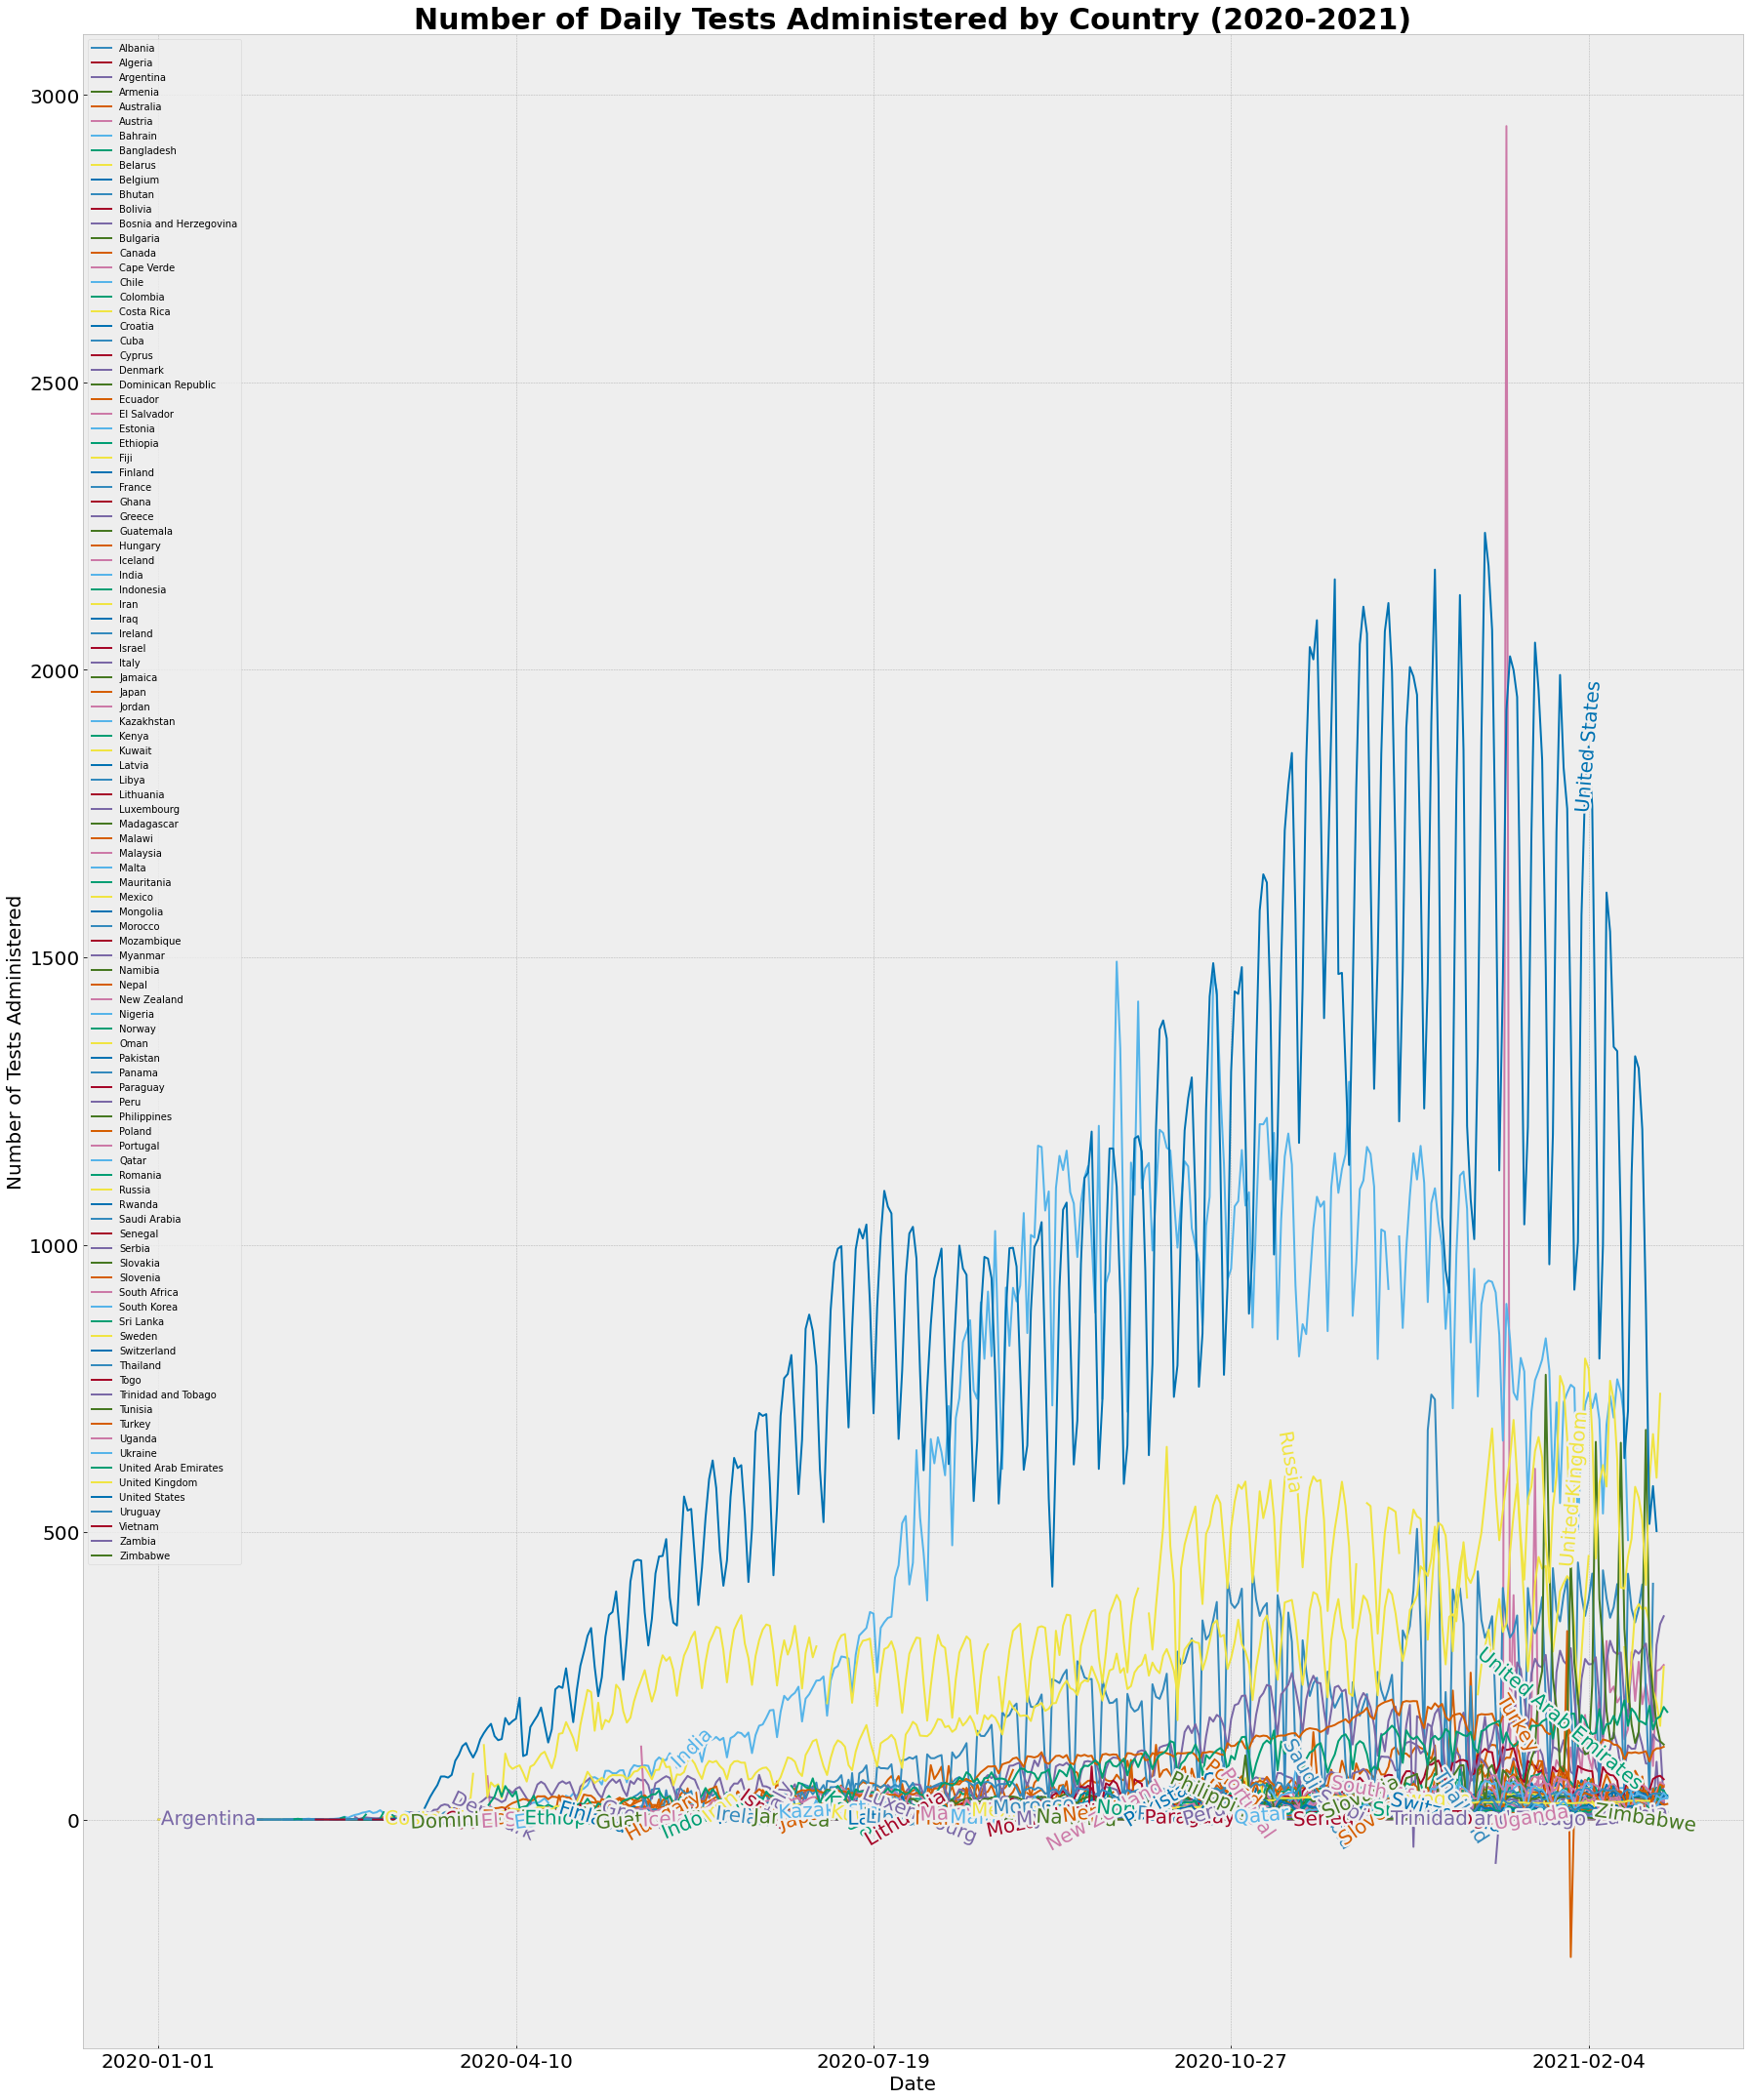

In [62]:
# Plotting daily tests per 1000 for all listed countries.
ax = data1.plot(figsize = (25,30), use_index=True)
ax.set_ylabel("Number of Tests Administered", fontsize=20)
ax.set_xlabel("Date", fontsize=20)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
#ax.get_legend().remove()
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.sans-serif'] = ["Lucida Grande"]
plt.title('Number of Daily Tests Administered by Country (2020-2021)', fontsize=30, fontweight = "bold")
plt.legend(loc='upper left', fontsize=10)
plt.ticklabel_format(style='plain', axis = 'y')
plt.tight_layout()
plt.style.use('bmh')
plt.grid(True)
labelLines(plt.gca().get_lines(), zorder=2.5, fontsize=20)
plt.show()

In [64]:
sql2 = """SELECT * FROM tests_sub;"""
data2 = pd.read_sql(sql2, conn, index_col = ['Date'])

/usr/local/lib/python3.7/dist-packages/labellines/core.py:73: UserWarning: Line2D(Austria) could not be annotated due to `nans` values. Consider using another location via the `x` argument.
  UserWarning,


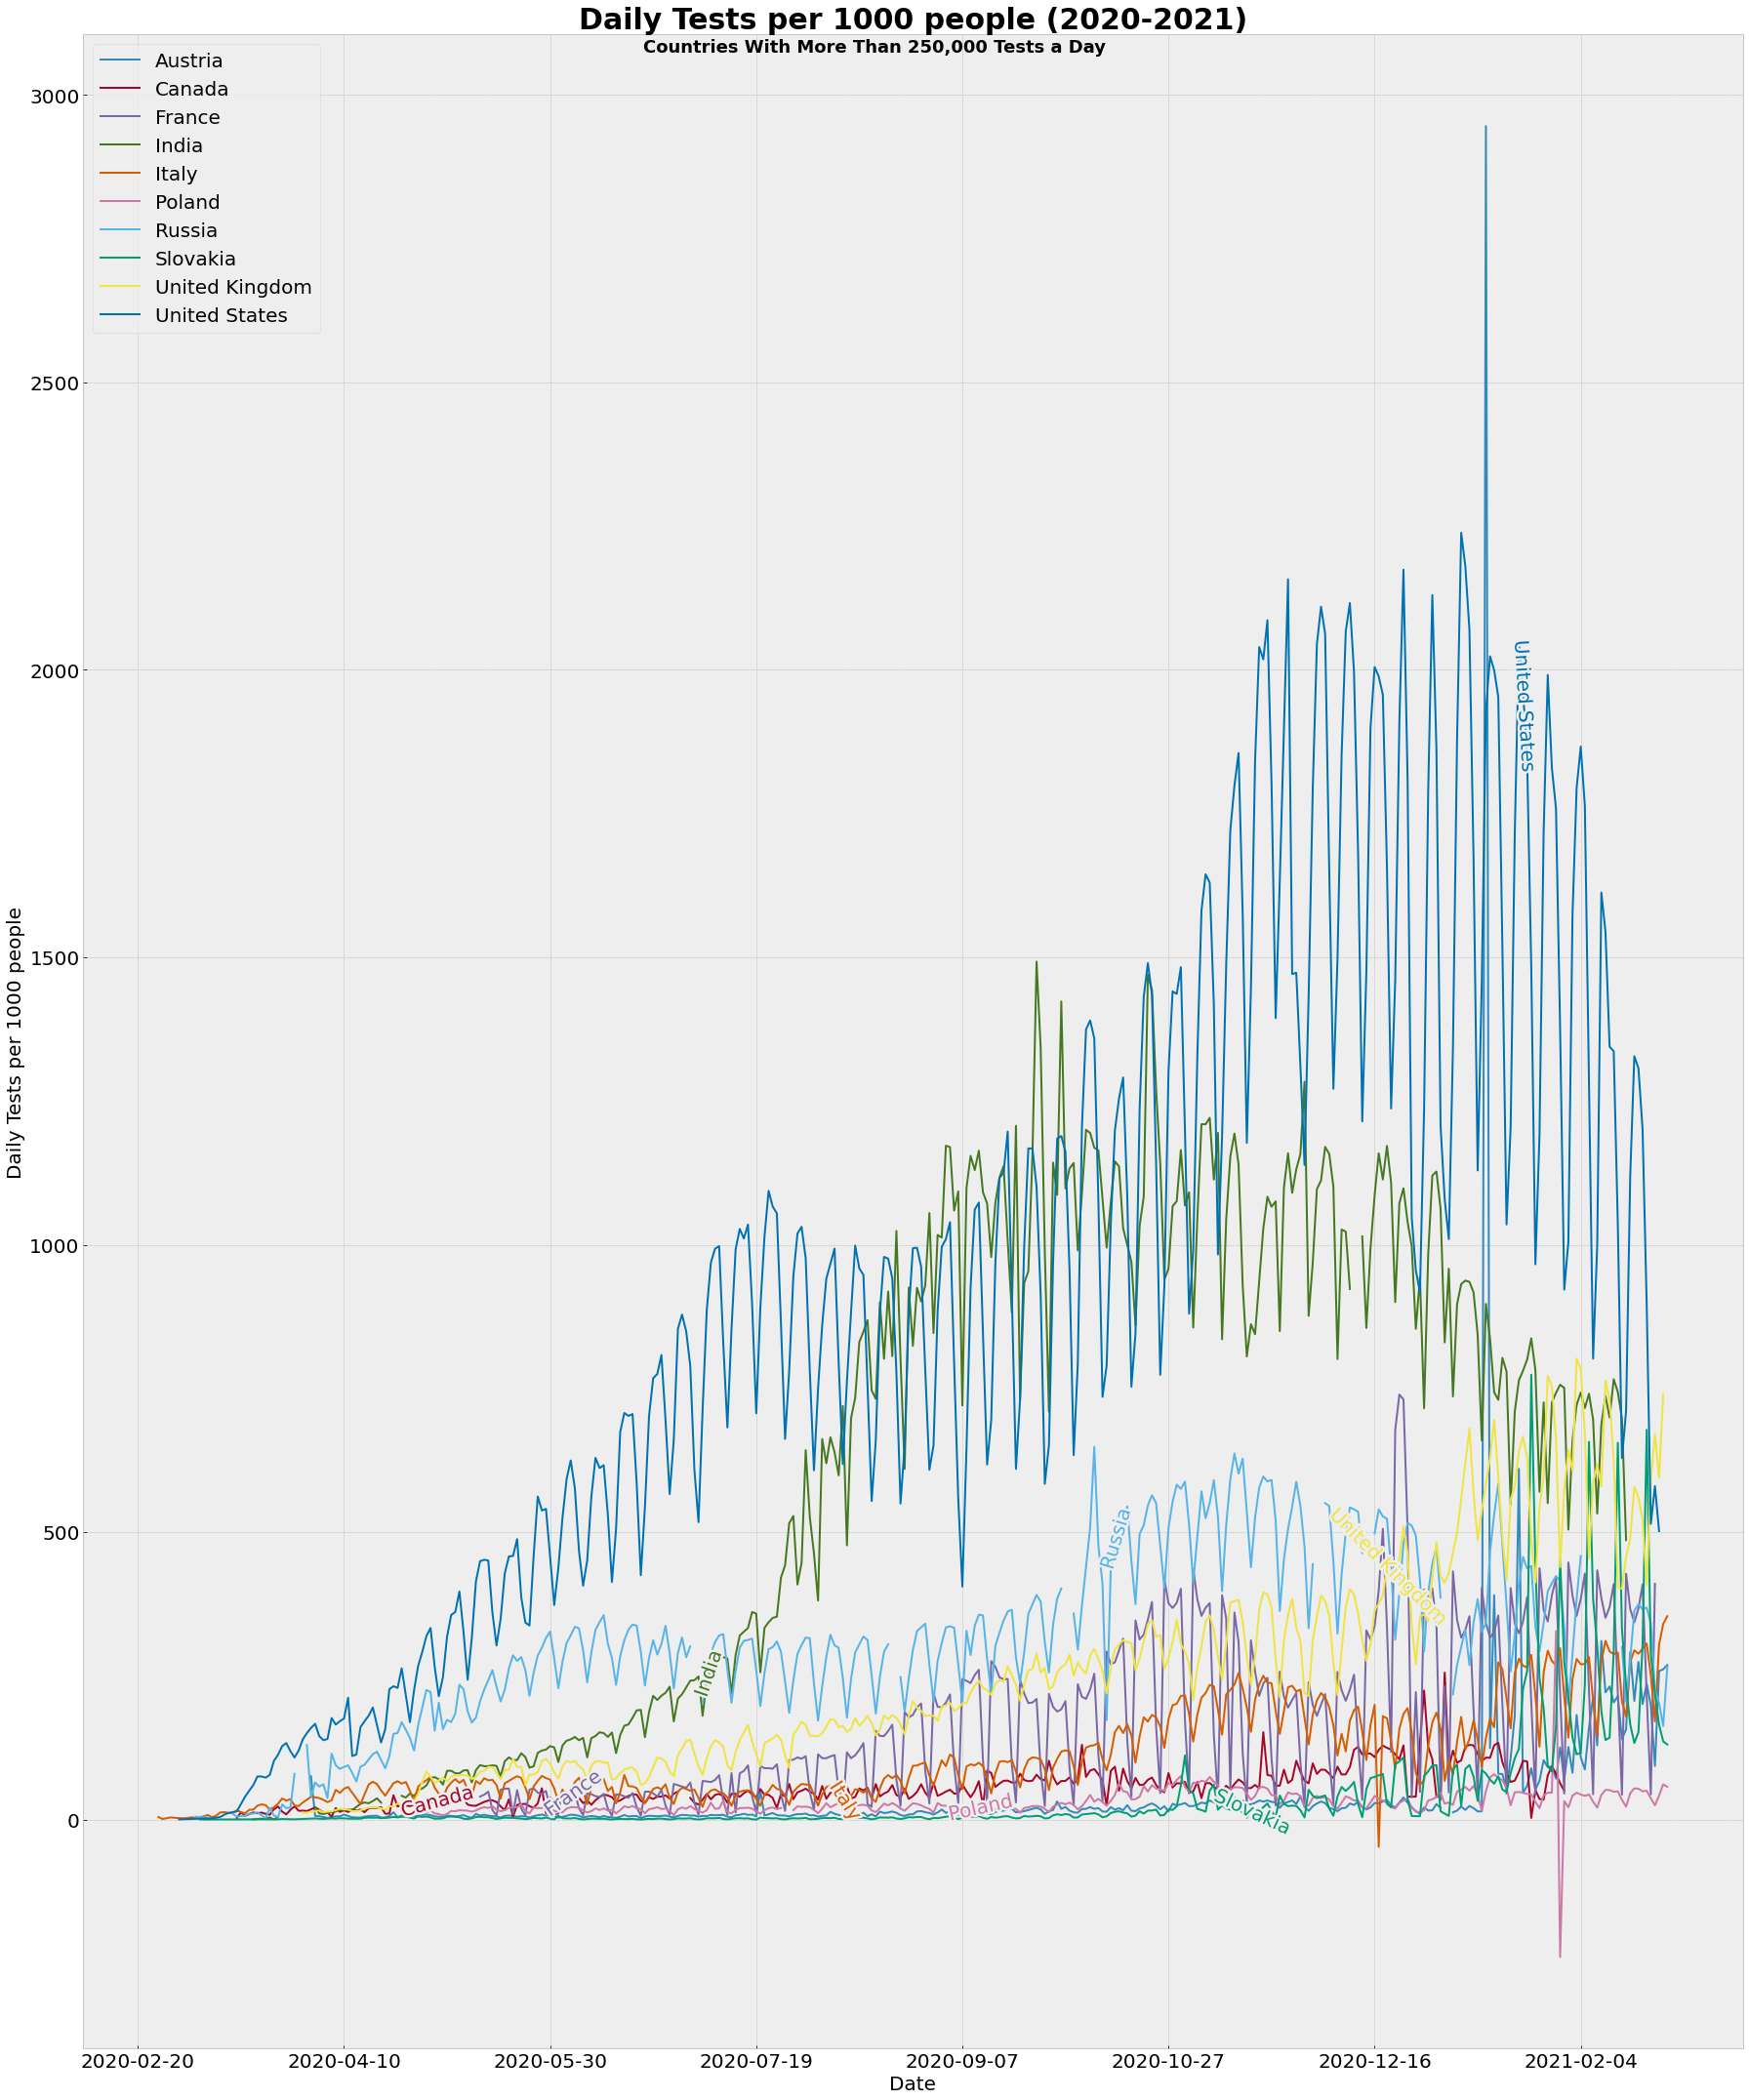

In [65]:
# Plotting daily tests per 1000 for subset of countries.
ax = data2.plot(figsize = (25,30), use_index=True)
ax.set_ylabel("Daily Tests per 1000 people", fontsize=20)
ax.set_xlabel("Date", fontsize=20)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
#ax.get_legend().remove()
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.sans-serif'] = ["Lucida Grande"]
plt.title('Daily Tests per 1000 people (2020-2021)', fontsize=30, fontweight = "bold")
plt.suptitle('Countries With More Than 250,000 Tests a Day',fontsize=18, fontweight = 'bold')
plt.legend(loc='upper left', fontsize=20)
plt.tight_layout()
plt.style.use('bmh')
plt.grid(True)
labelLines(plt.gca().get_lines(), zorder=2.5, fontsize=20)
plt.show()

### Visualisation: Number of Cases Over Time

In [66]:
from labellines import labelLine, labelLines

In [67]:
sql3 = """SELECT * FROM cases;"""
data3 = pd.read_sql(sql3, conn, index_col = ['Date'])

/usr/local/lib/python3.7/dist-packages/labellines/core.py:73: UserWarning: Line2D(Albania) could not be annotated due to `nans` values. Consider using another location via the `x` argument.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/labellines/core.py:73: UserWarning: Line2D(Algeria) could not be annotated due to `nans` values. Consider using another location via the `x` argument.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/labellines/core.py:73: UserWarning: Line2D(Argentina) could not be annotated due to `nans` values. Consider using another location via the `x` argument.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/labellines/core.py:73: UserWarning: Line2D(Armenia) could not be annotated due to `nans` values. Consider using another location via the `x` argument.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/labellines/core.py:73: UserWarning: Line2D(Austria) could not be annotated due to `nans` values. Consider using another location via the `x

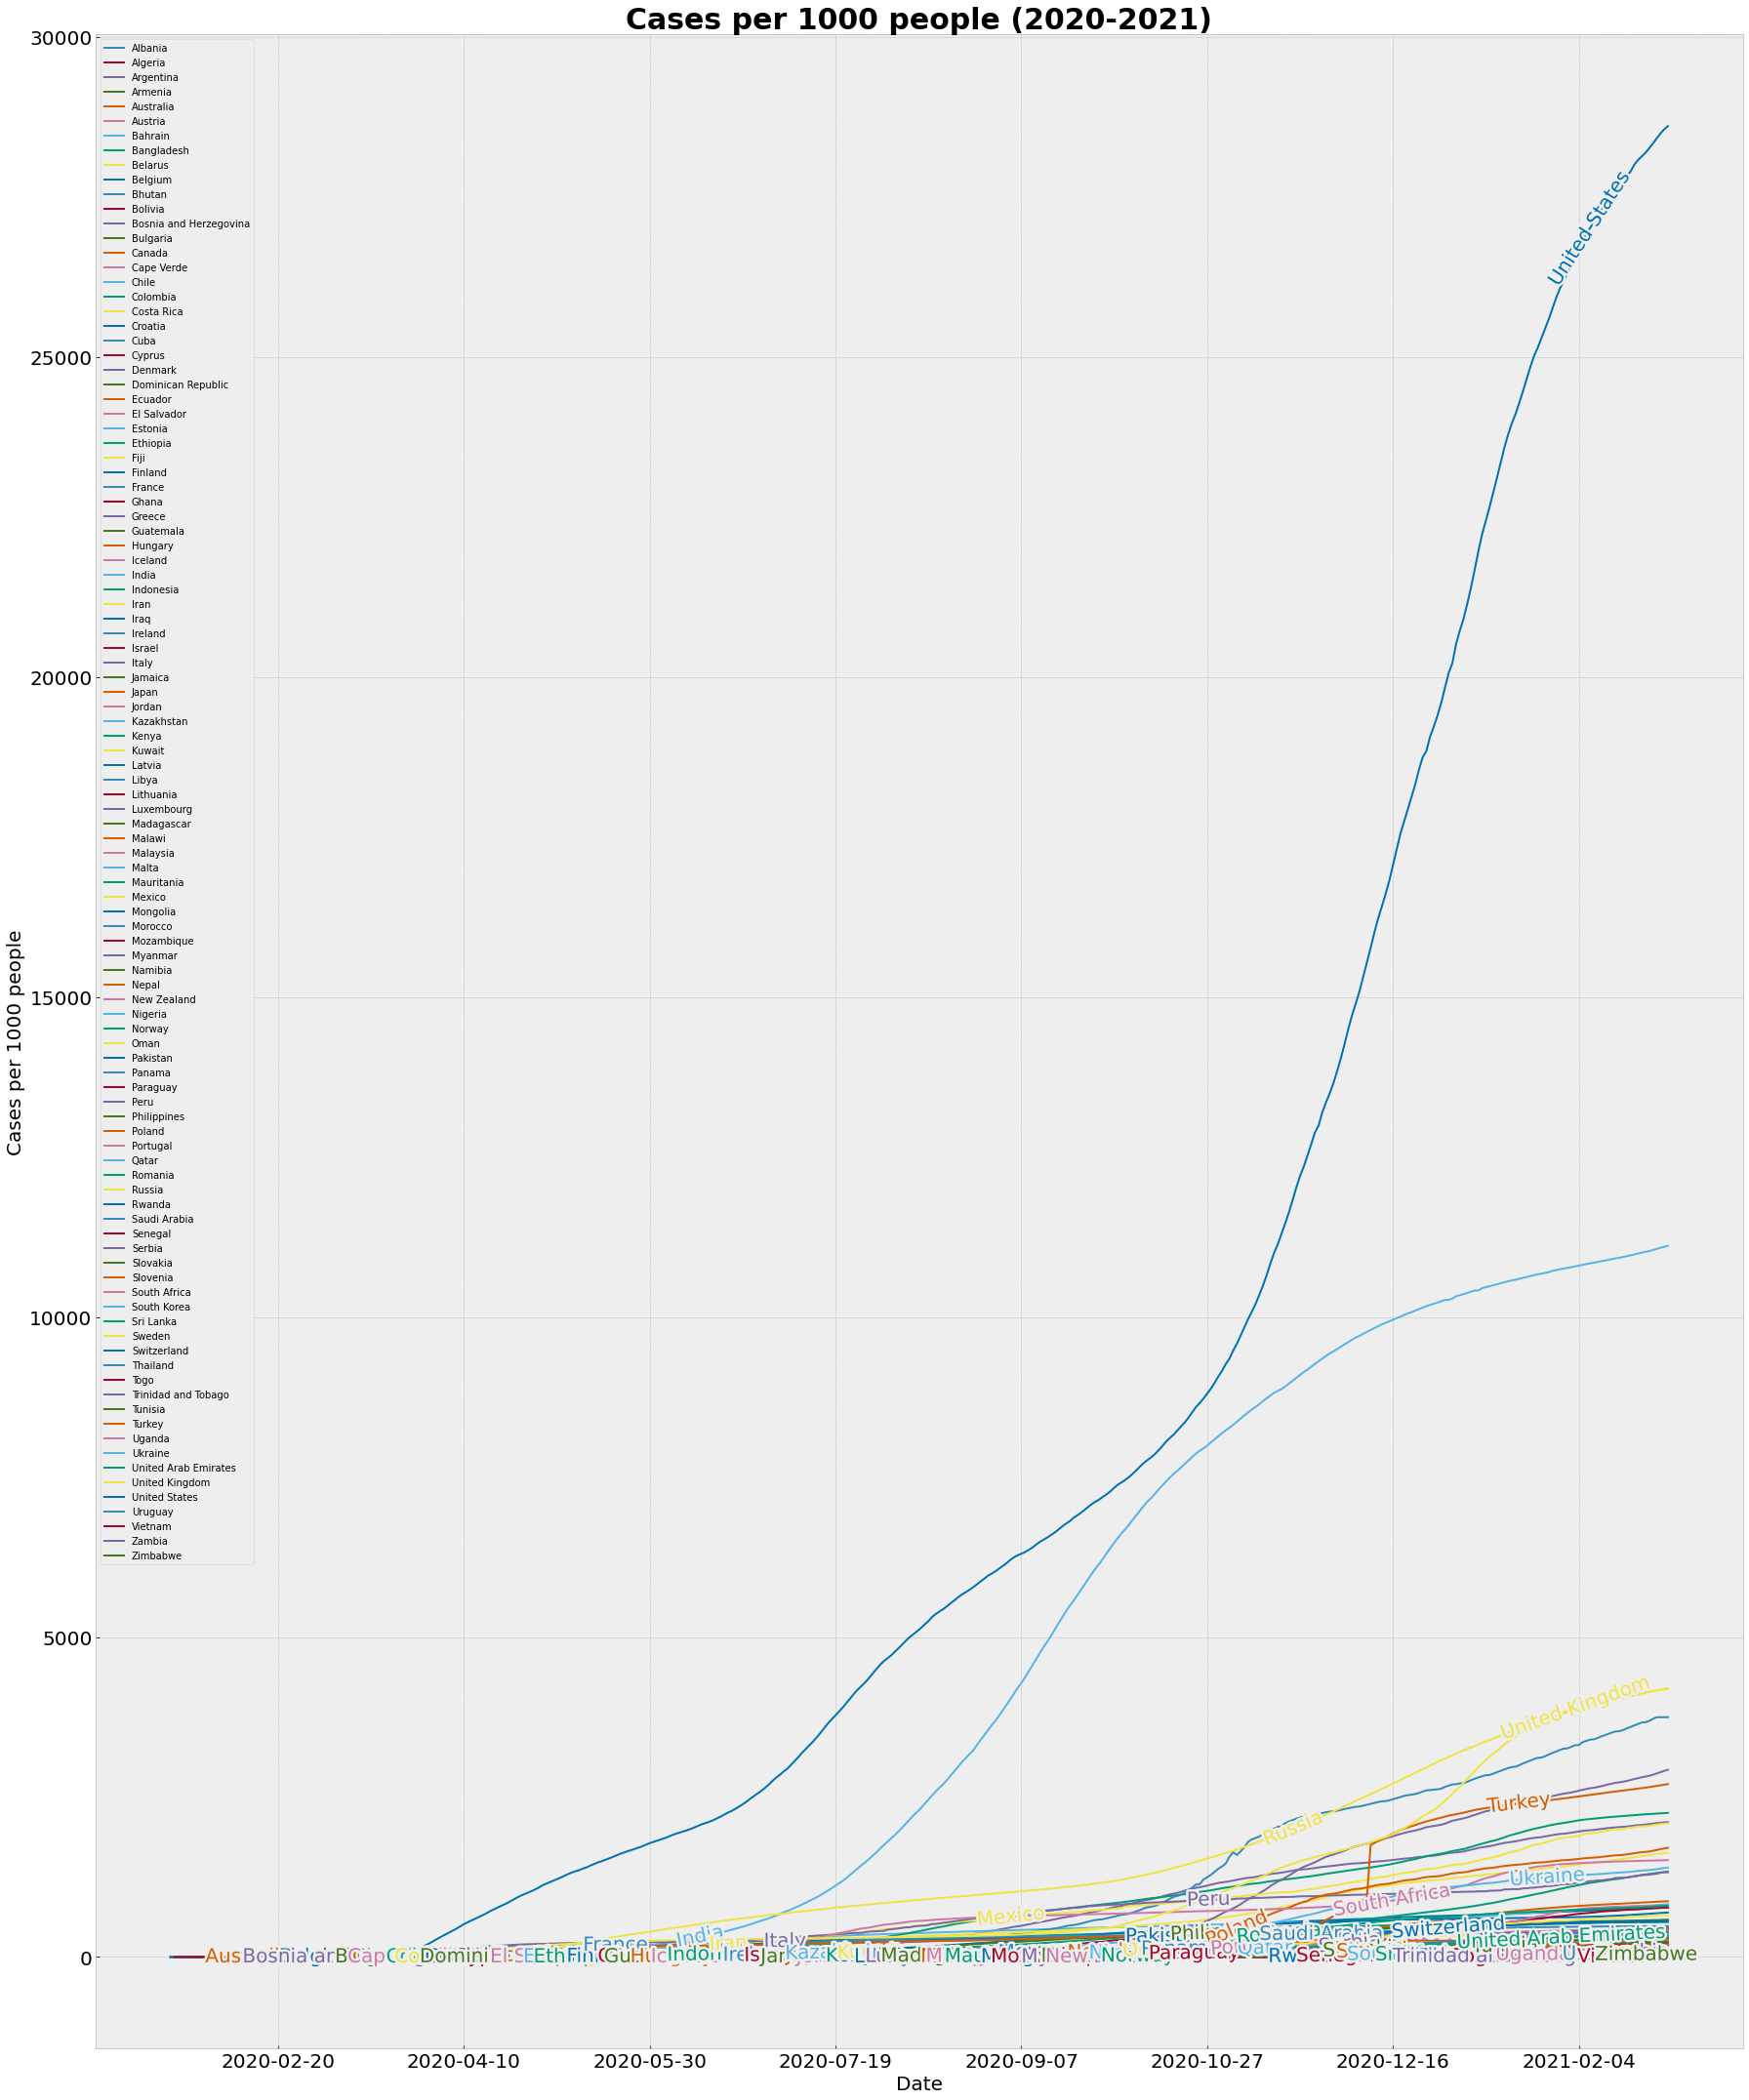

In [70]:
# Plotting cases per 1000 for all listed countries.
ax = data3.plot(figsize = (25,30), use_index=True)
ax.set_ylabel("Cases per 1000 people", fontsize=20)
ax.set_xlabel("Date", fontsize=20)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
#ax.get_legend().remove()
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.sans-serif'] = ["Lucida Grande"]
plt.title('Cases per 1000 people (2020-2021)', fontsize=30, fontweight = "bold")
plt.legend(loc='upper left', fontsize=10)
plt.tight_layout()
plt.style.use('bmh')
plt.grid(True)
labelLines(plt.gca().get_lines(), zorder=2.5, fontsize=20)
plt.show()

In [71]:
sql4 = """SELECT * FROM cases_sub;"""
data4 = pd.read_sql(sql4, conn, index_col = ['Date'])

/usr/local/lib/python3.7/dist-packages/labellines/core.py:73: UserWarning: Line2D(Argentina) could not be annotated due to `nans` values. Consider using another location via the `x` argument.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/labellines/core.py:73: UserWarning: Line2D(Bangladesh) could not be annotated due to `nans` values. Consider using another location via the `x` argument.
  UserWarning,


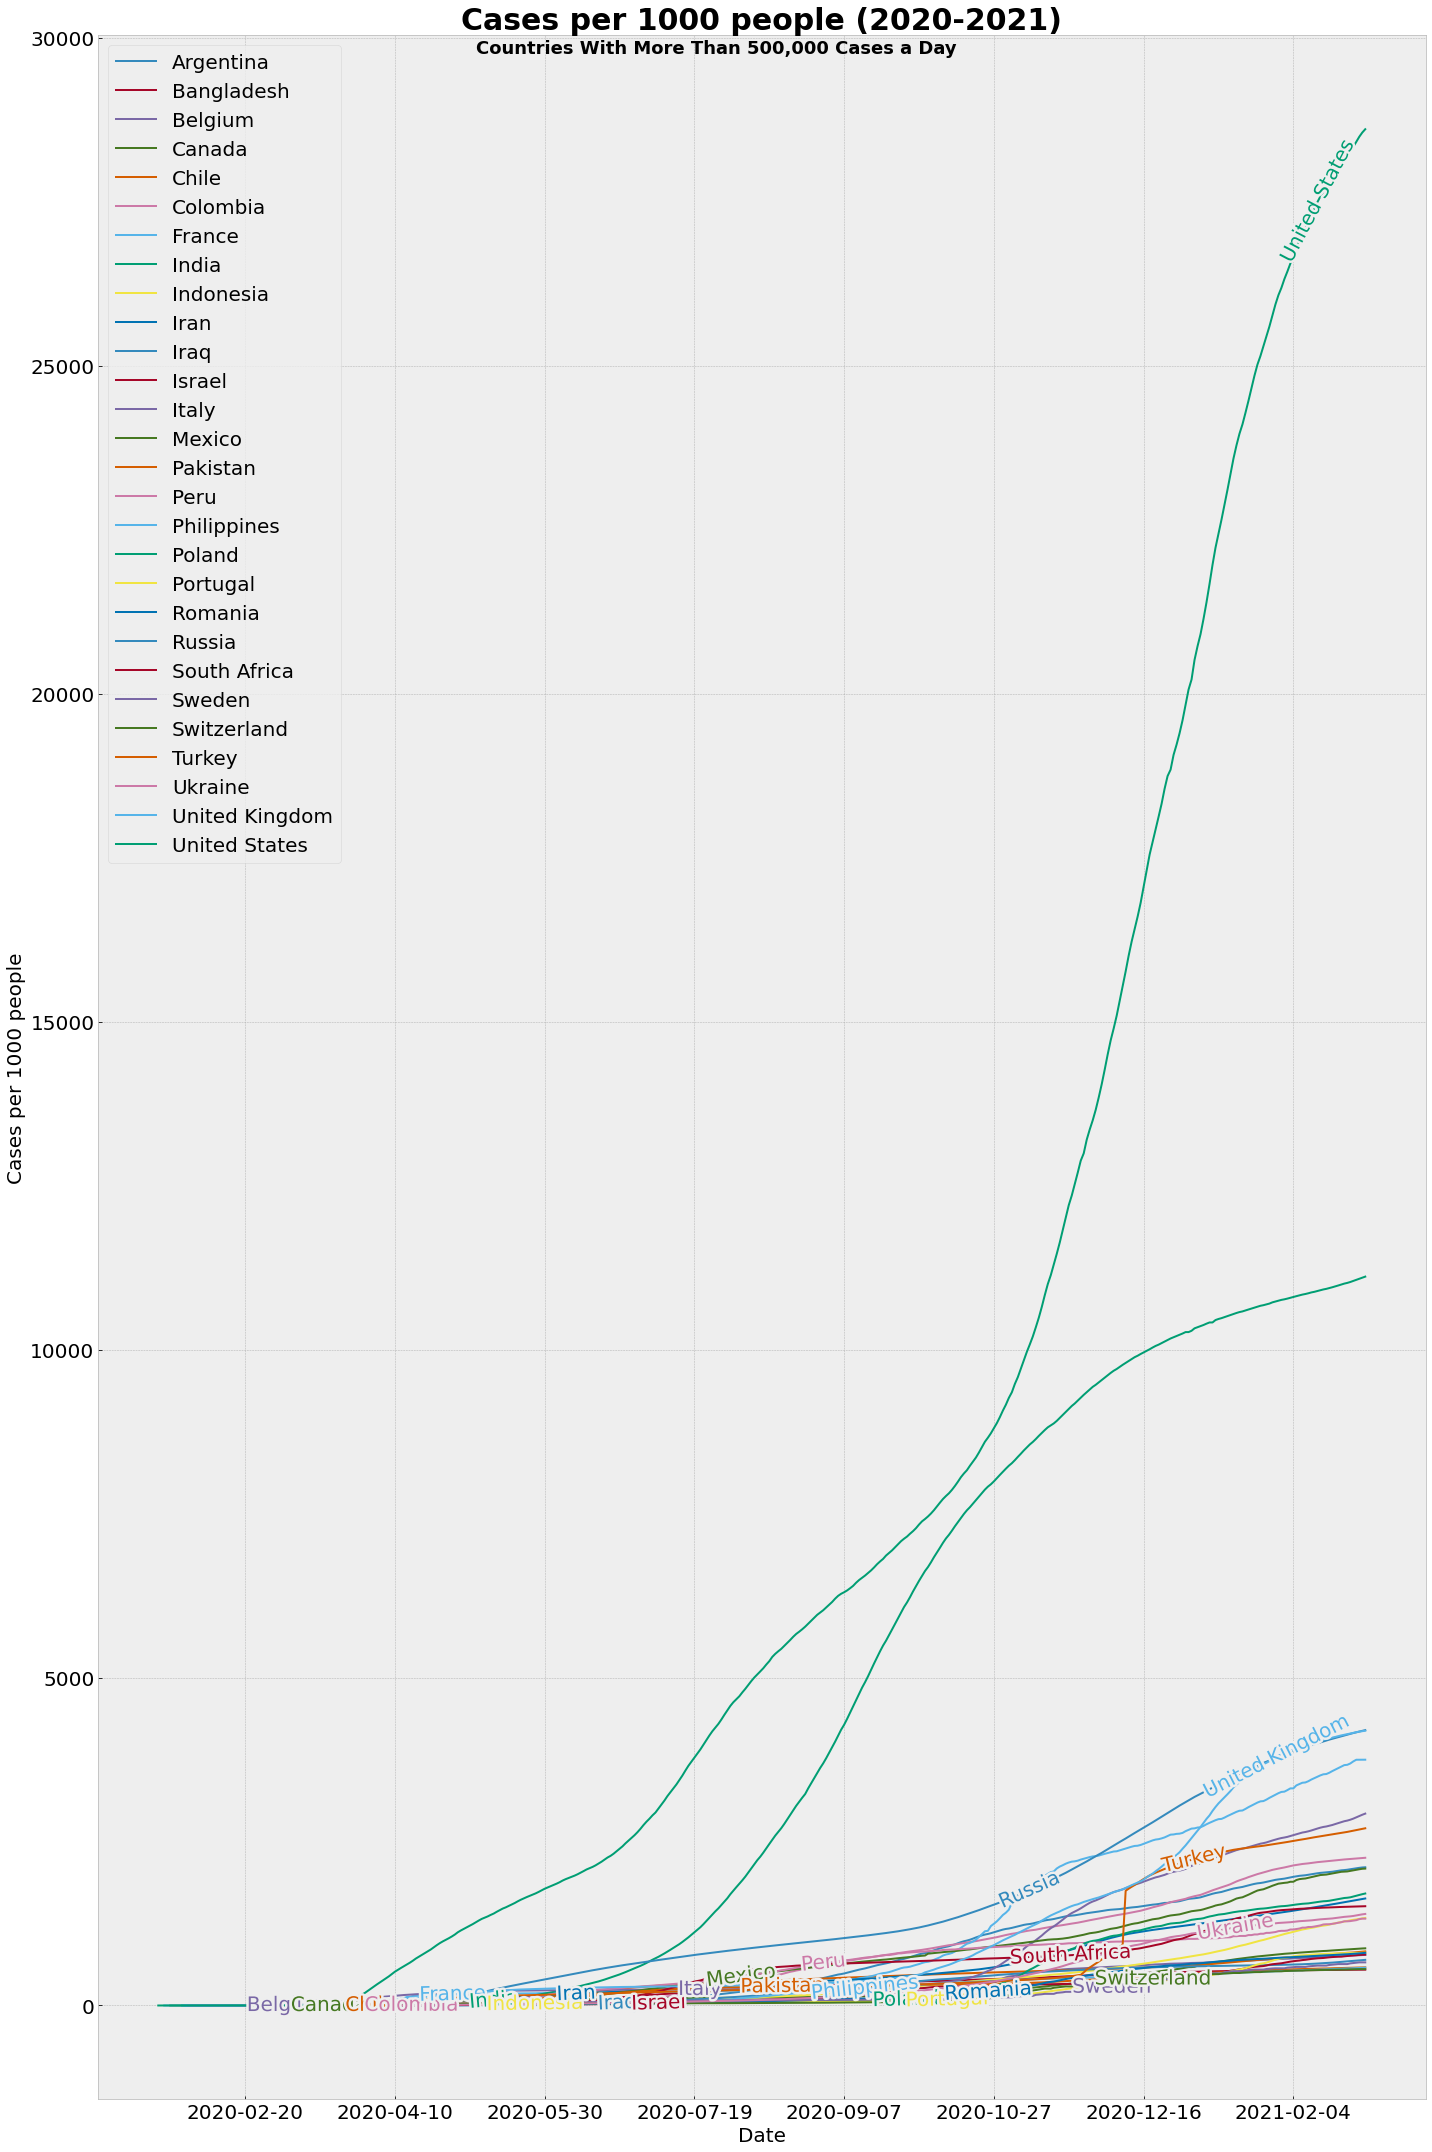

In [102]:
# Plotting cases per 1000 for subset of countries.
ax = data4.plot(figsize = (20,30), use_index=True)
ax.set_ylabel("Cases per 1000 people", fontsize=20)
ax.set_xlabel("Date", fontsize=20)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
#ax.get_legend().remove()
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.sans-serif'] = ["Lucida Grande"]
plt.title('Cases per 1000 people (2020-2021)', fontsize=30, fontweight = "bold")
plt.suptitle('Countries With More Than 500,000 Cases a Day',fontsize=18, fontweight = 'bold')
plt.legend(loc='upper left', fontsize=20)
plt.tight_layout()
plt.style.use('bmh')
plt.grid(True)
labelLines(plt.gca().get_lines(), zorder=2.5, fontsize=20)
plt.show()

### Visualisation: Number of Deaths Over Time

In [73]:
from labellines import labelLine, labelLines

In [74]:
sql5 = """SELECT * FROM deaths;"""
data5 = pd.read_sql(sql5, conn, index_col = ['Date'])

/usr/local/lib/python3.7/dist-packages/labellines/core.py:73: UserWarning: Line2D(Albania) could not be annotated due to `nans` values. Consider using another location via the `x` argument.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/labellines/core.py:73: UserWarning: Line2D(Algeria) could not be annotated due to `nans` values. Consider using another location via the `x` argument.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/labellines/core.py:73: UserWarning: Line2D(Argentina) could not be annotated due to `nans` values. Consider using another location via the `x` argument.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/labellines/core.py:73: UserWarning: Line2D(Armenia) could not be annotated due to `nans` values. Consider using another location via the `x` argument.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/labellines/core.py:73: UserWarning: Line2D(Australia) could not be annotated due to `nans` values. Consider using another location via the 

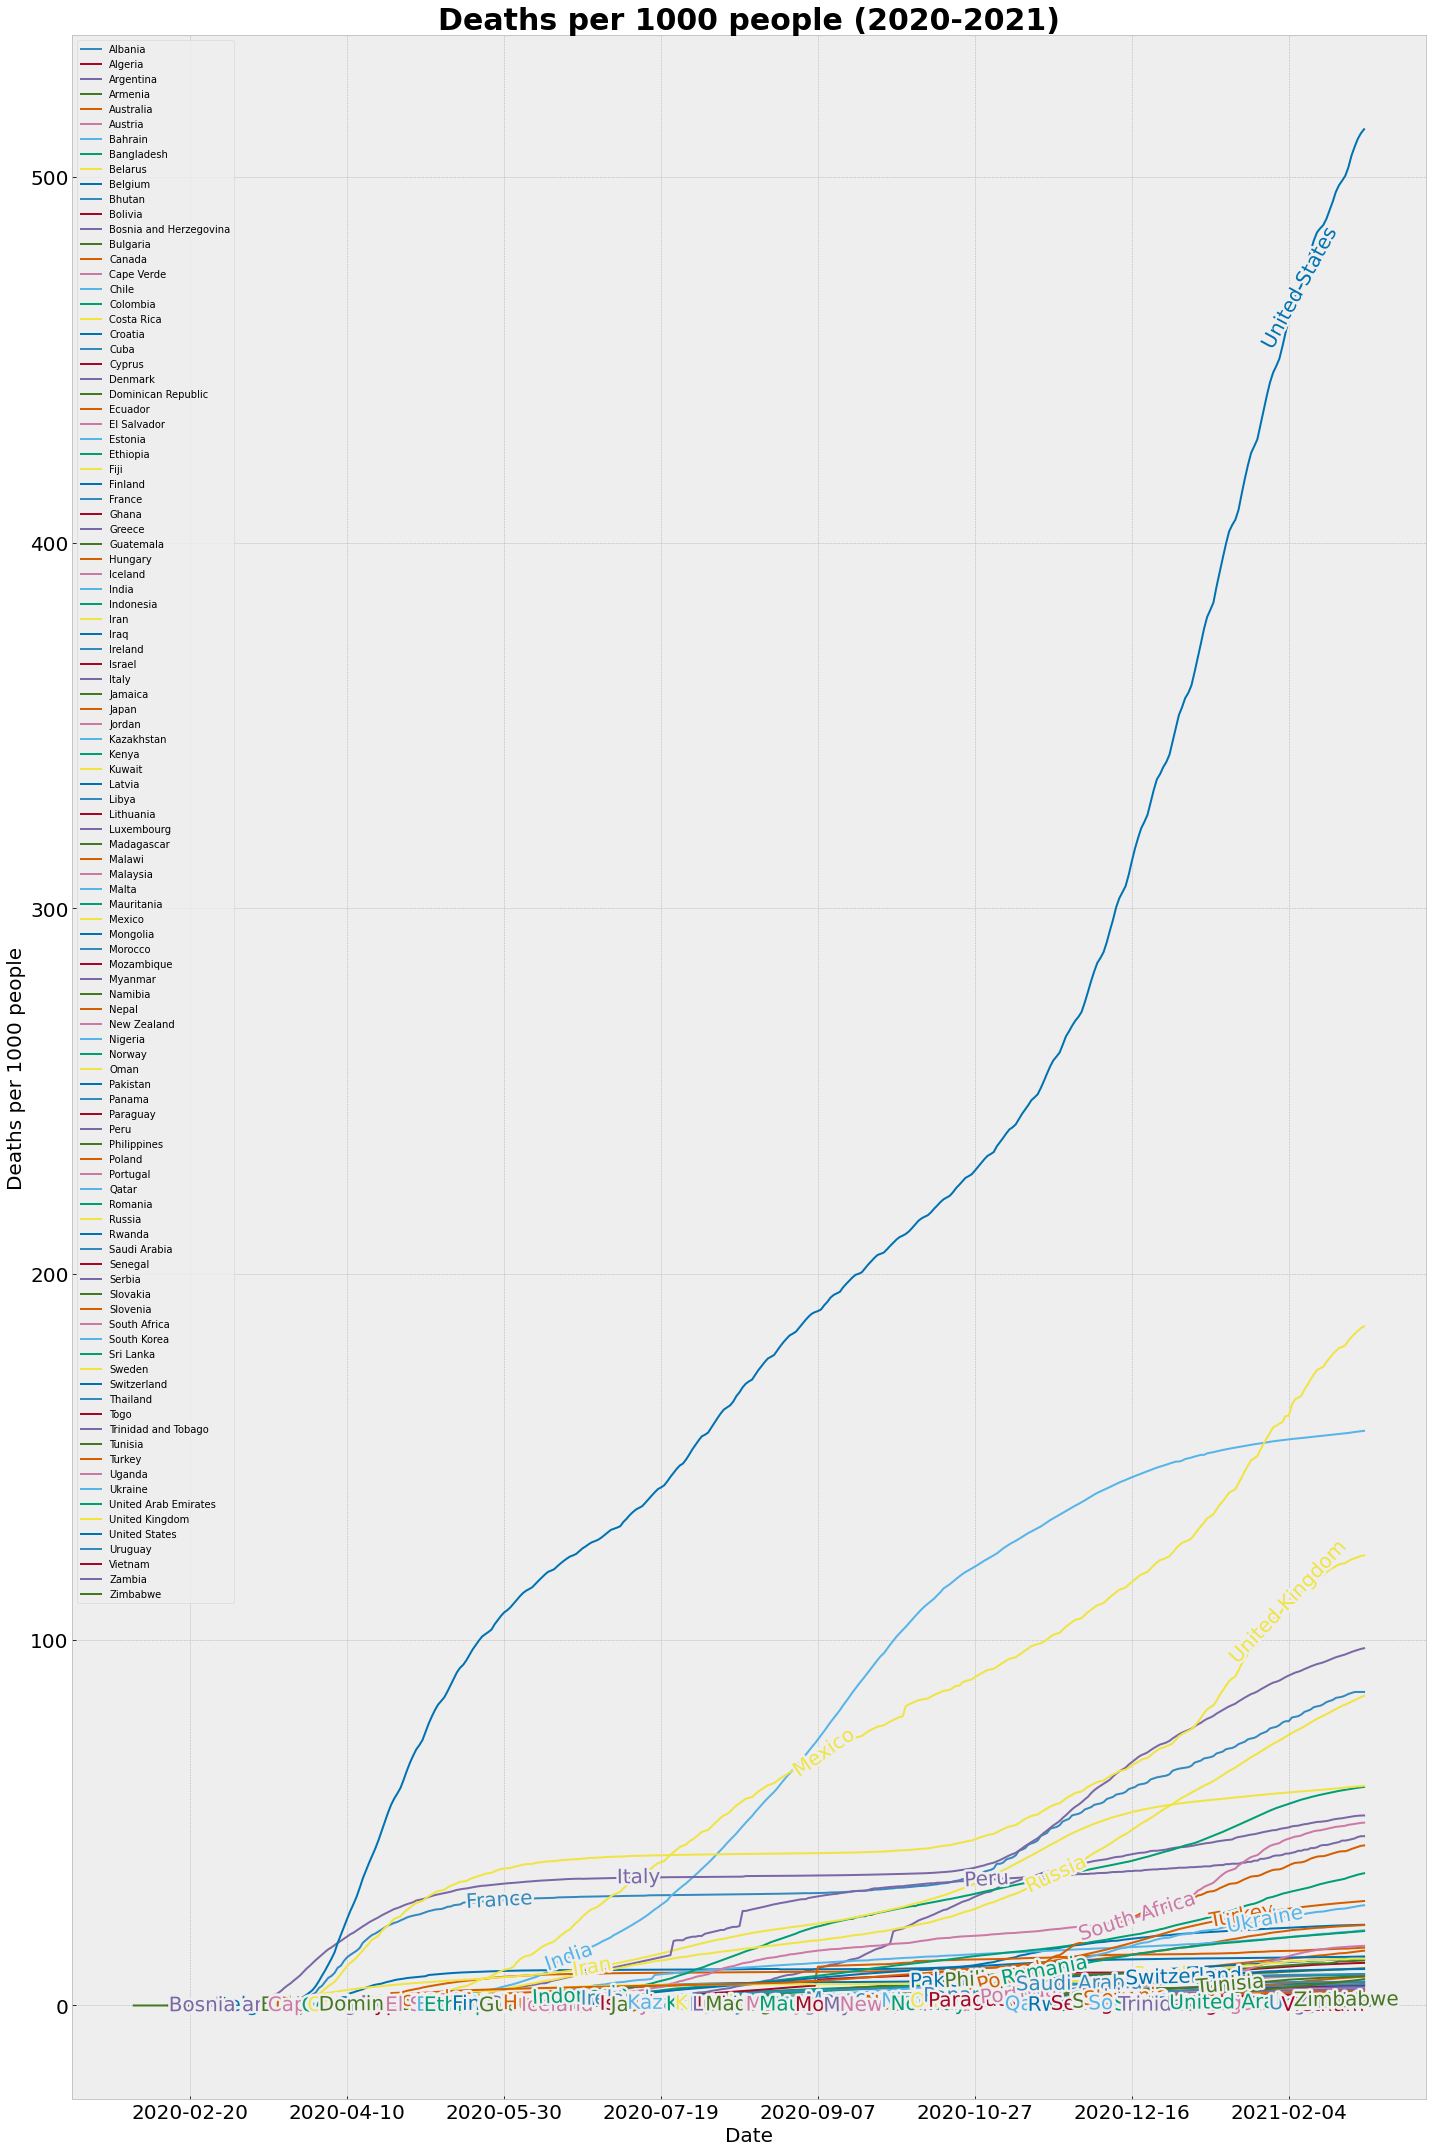

In [75]:
# Plotting deaths per 1000 for all listed countries.
ax = data5.plot(figsize = (20,30), use_index=True)
ax.set_ylabel("Deaths per 1000 people", fontsize=20)
ax.set_xlabel("Date", fontsize=20)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
#ax.get_legend().remove()
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.sans-serif'] = ["Lucida Grande"]
plt.title('Deaths per 1000 people (2020-2021)', fontsize=30, fontweight = "bold")
plt.legend(loc='upper left', fontsize=10)
plt.tight_layout()
plt.style.use('bmh')
plt.grid(True)
labelLines(plt.gca().get_lines(), zorder=2.5, fontsize=20)
plt.show()

In [76]:
sql6 = """SELECT * FROM deaths_sub;"""
data6 = pd.read_sql(sql6, conn, index_col = ['Date'])

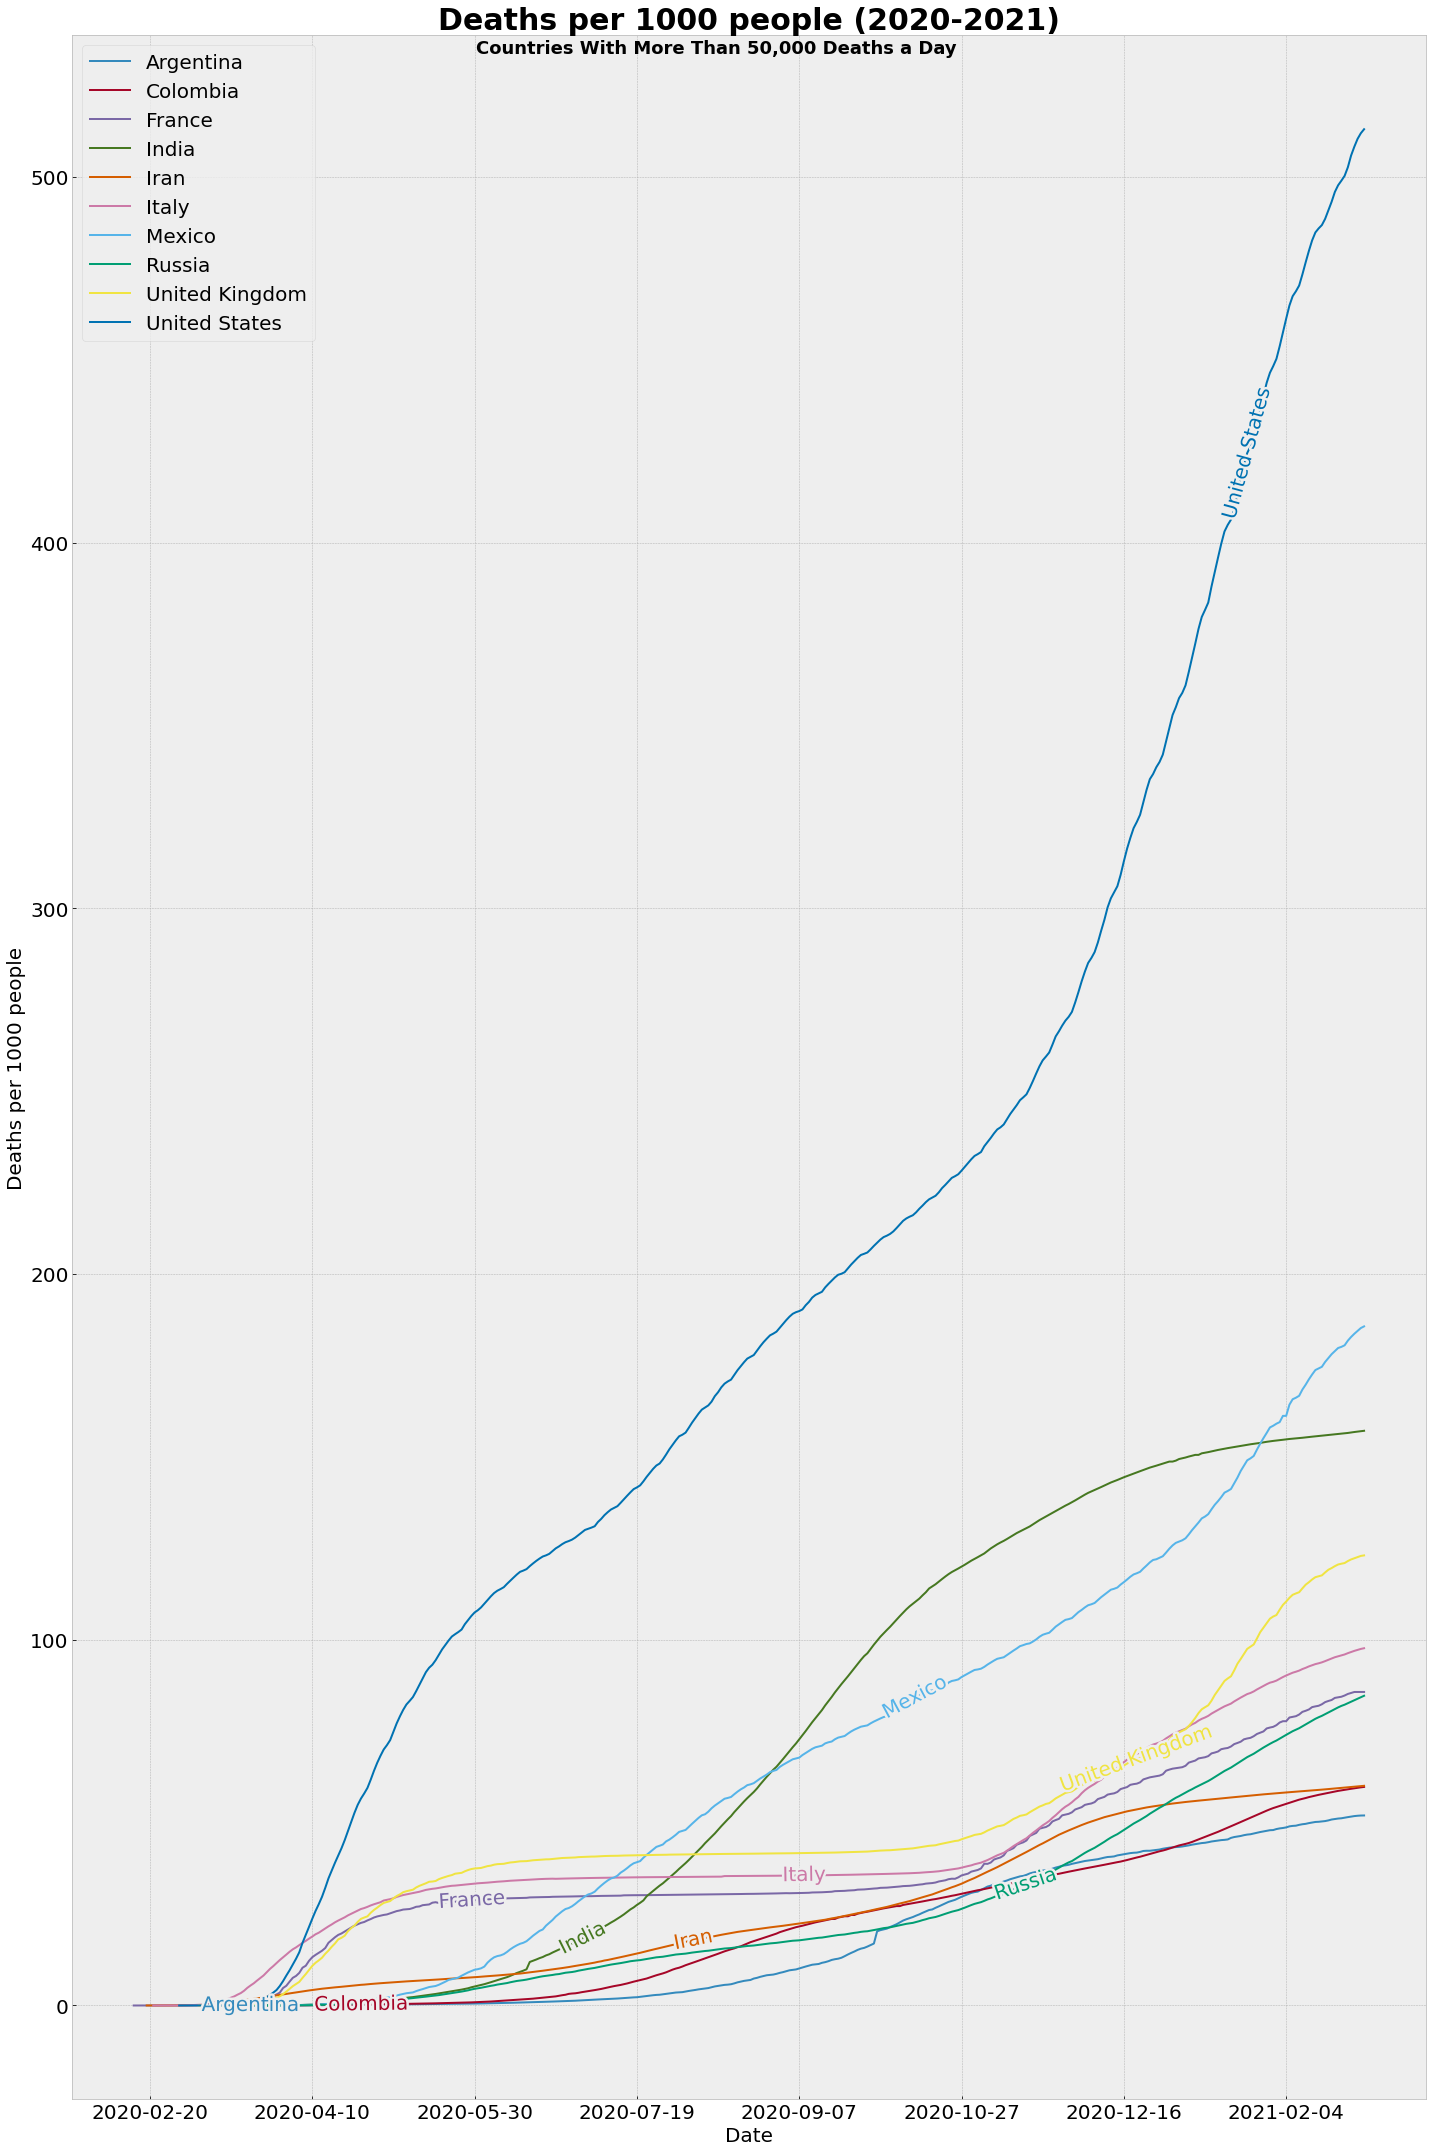

In [77]:
# Plotting deaths per 1000 for subset of countries.
ax = data6.plot(figsize = (20,30), use_index=True)
ax.set_ylabel("Deaths per 1000 people", fontsize=20)
ax.set_xlabel("Date", fontsize=20)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
#ax.get_legend().remove()
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.sans-serif'] = ["Lucida Grande"]
plt.title('Deaths per 1000 people (2020-2021)', fontsize=30, fontweight = "bold")
plt.suptitle('Countries With More Than 50,000 Deaths a Day',fontsize=18, fontweight = 'bold')
plt.legend(loc='upper left', fontsize=20)
plt.tight_layout()
plt.style.use('bmh')
plt.grid(True)
labelLines(plt.gca().get_lines(), zorder=2.5, fontsize=20)
plt.show()

### Visualisation: World Map of Average Daily Tests

In [78]:
sql7 = """SELECT daily.CODE, daily.Entity, AVG(daily.DailyTests_per_1000) AS [AverageTestsper1000], country.Latitude, country.Longitude FROM daily
LEFT JOIN country ON country.id=daily.id
GROUP BY daily.Entity;"""
data7 = pd.read_sql(sql7, conn)

In [79]:
data7

CODE         Entity  AverageTestsper1000  Latitude  Longitude
0     ALB        Albania             1.192832     41.15      20.17
1     DZA        Algeria             1.033333     28.03       1.66
2     ARG      Argentina            15.390745    -38.42     -63.62
3     ARM        Armenia             1.880340     40.07      45.04
4     AUS      Australia            41.312128    -25.27     133.78
..    ...            ...                  ...       ...        ...
99    USA  United States           912.236261     37.09     -95.71
100   URY        Uruguay             3.013139    -32.52     -55.77
101  None        Vietnam             5.753293     14.06     108.28
102   ZMB         Zambia             3.390601    -13.13      27.85
103   ZWE       Zimbabwe             1.272080    -19.02      29.15

[104 rows x 5 columns]

In [80]:
# make a geometry object from Lat, Long
geotests = gpd.points_from_xy(data7.Longitude, data7.Latitude) 
# give the geometry to geopandas together with c
gctests = gpd.GeoDataFrame(data7, geometry=geotests)         
gctests.head()

CODE     Entity  AverageTestsper1000  Latitude  Longitude  \
0  ALB    Albania             1.192832     41.15      20.17   
1  DZA    Algeria             1.033333     28.03       1.66   
2  ARG  Argentina            15.390745    -38.42     -63.62   
3  ARM    Armenia             1.880340     40.07      45.04   
4  AUS  Australia            41.312128    -25.27     133.78   

                      geometry  
0    POINT (20.17000 41.15000)  
1     POINT (1.66000 28.03000)  
2  POINT (-63.62000 -38.42000)  
3    POINT (45.04000 40.07000)  
4  POINT (133.78000 -25.27000)

In [81]:
# Merging datasets for visualisation
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world.columns=['pop_est', 'continent', 'name', 'CODE', 'gdp_md_est', 'geometry']  # Renaming iso_a3 column to CODE columns will match in both datasets

mergetests = pd.merge(world, gctests, on='CODE')

mergetests = mergetests.rename(columns = {"geometry_x": "geometry"})

mergetests = mergetests.drop(columns = ['geometry_y'])

mergetests = mergetests.sort_values(by='AverageTestsper1000', ascending=False)

mergetests = mergetests.reset_index()

In [83]:
mergetests.head()

index     pop_est      continent                      name CODE  \
0      2   326625791  North America  United States of America  USA   
1     44  1281935911           Asia                     India  IND   
2     75    64769452         Europe            United Kingdom  GBR   
3     73    62137802         Europe                     Italy  ITA   
4     62    80845215           Asia                    Turkey  TUR   

   gdp_md_est                                           geometry  \
0  18560000.0  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...   
1   8721000.0  POLYGON ((97.32711 28.26158, 97.40256 27.88254...   
2   2788000.0  MULTIPOLYGON (((-6.19788 53.86757, -6.95373 54...   
3   2221000.0  MULTIPOLYGON (((10.44270 46.89355, 11.04856 46...   
4   1670000.0  MULTIPOLYGON (((44.77268 37.17044, 44.29345 37...   

           Entity  AverageTestsper1000  Latitude  Longitude  
0   United States           912.236261     37.09     -95.71  
1           India           639.512728     20.59      78.96  
2  United Kingdom           251.806728     55.38      -3.44  
3           Italy           106.874899     41.87      12.57  
4          Turkey            97.532690     38.96      35.24

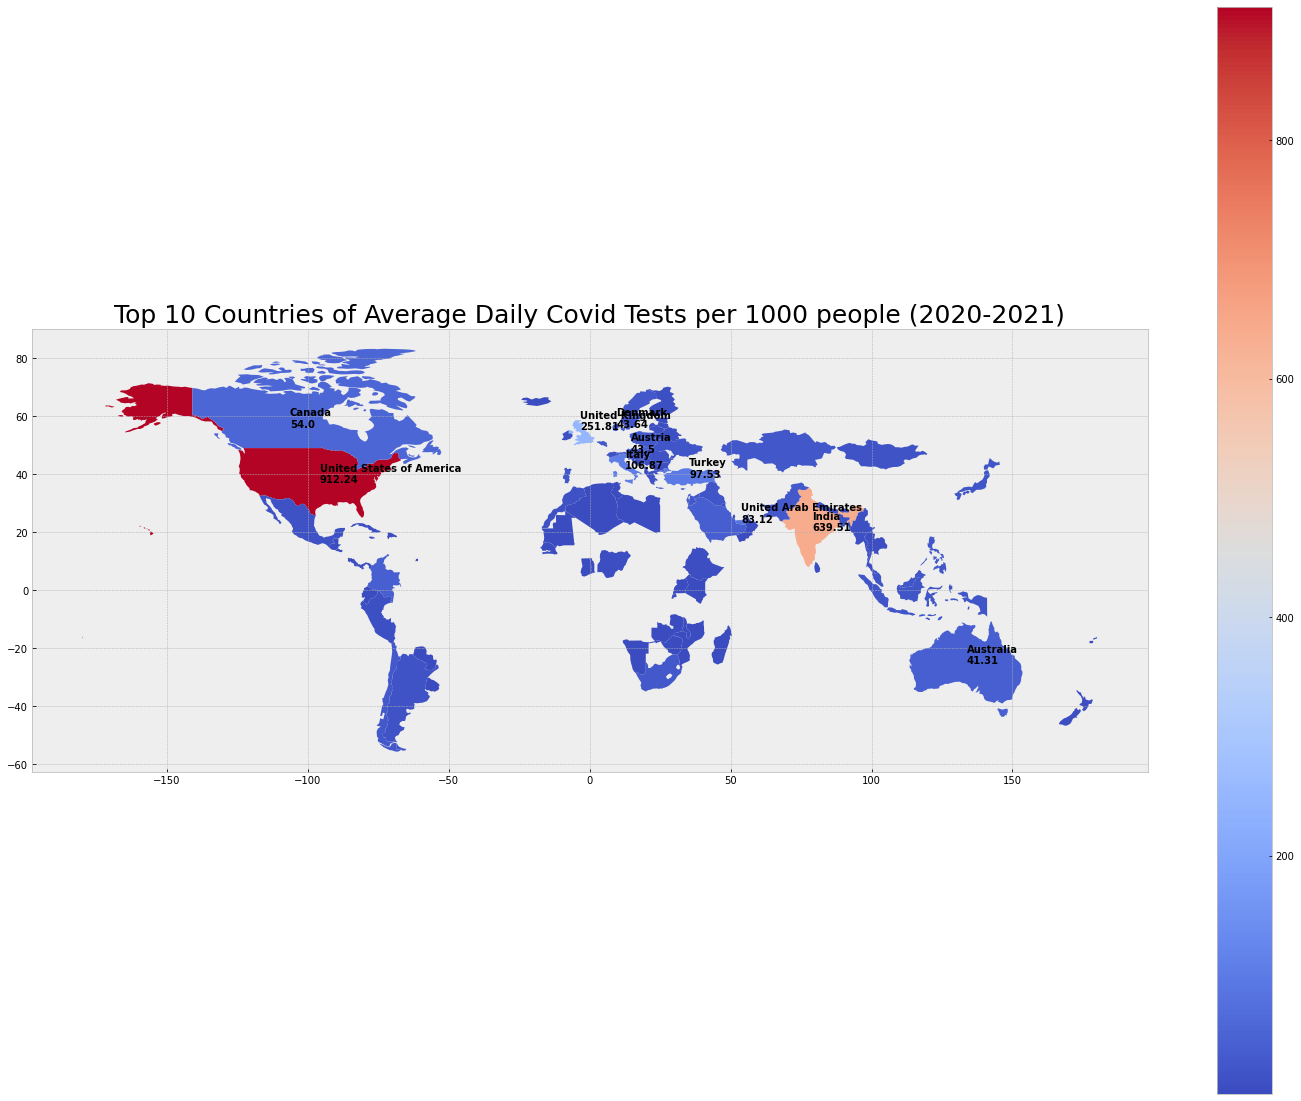

In [85]:
# plot test world map 
mergetests.plot(column='AverageTestsper1000',
           figsize=(25, 20),
           legend=True,cmap='coolwarm',
           missing_kwds={'color': 'lightgrey'})
plt.title('Top 10 Countries of Average Daily Covid Tests per 1000 people (2020-2021)',fontsize=25)
# add countries names and numbers 
for i in range(0,10):
    plt.text(float(mergetests.Longitude[i]),float(mergetests.Latitude[i]),"{}\n{}".format(mergetests.name[i],round(mergetests.AverageTestsper1000[i],2)),size=10, fontweight = "bold")
plt.show()

### Visualisation: World Map of Average Cases

In [86]:
sql8 = """SELECT daily.CODE, daily.Entity, AVG(daily.Cases_per_1000) AS [AverageCasesper1000], country.Latitude, country.Longitude FROM daily
LEFT JOIN country ON country.id=daily.id
GROUP BY daily.Entity;"""
data8 = pd.read_sql(sql8, conn)

In [87]:
data8

CODE         Entity  AverageCasesper1000  Latitude  Longitude
0     ALB        Albania            23.603591     41.15      20.17
1     DZA        Algeria            45.655019     28.03       1.66
2     ARG      Argentina           717.307799    -38.42     -63.62
3     ARM        Armenia            66.767937     40.07      45.04
4     AUS      Australia            16.973565    -25.27     133.78
..    ...            ...                  ...       ...        ...
99    USA  United States          7991.328453     37.09     -95.71
100   URY        Uruguay             8.799329    -32.52     -55.77
101  None        Vietnam             0.816893     14.06     108.28
102   ZMB         Zambia            15.718172    -13.13      27.85
103   ZWE       Zimbabwe             8.981931    -19.02      29.15

[104 rows x 5 columns]

In [88]:
# make a geometry object from Lat, Long
geocases = gpd.points_from_xy(data8.Longitude, data8.Latitude) 
# give the geometry to geopandas together with c
gccases = gpd.GeoDataFrame(data8, geometry=geocases)         
gccases.head()

CODE     Entity  AverageCasesper1000  Latitude  Longitude  \
0  ALB    Albania            23.603591     41.15      20.17   
1  DZA    Algeria            45.655019     28.03       1.66   
2  ARG  Argentina           717.307799    -38.42     -63.62   
3  ARM    Armenia            66.767937     40.07      45.04   
4  AUS  Australia            16.973565    -25.27     133.78   

                      geometry  
0    POINT (20.17000 41.15000)  
1     POINT (1.66000 28.03000)  
2  POINT (-63.62000 -38.42000)  
3    POINT (45.04000 40.07000)  
4  POINT (133.78000 -25.27000)

In [89]:
# Merging datasets for visualisation
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world.columns=['pop_est', 'continent', 'name', 'CODE', 'gdp_md_est', 'geometry']  # Renaming iso_a3 column to CODE columns will match in both datasets

mergecases = pd.merge(world, data8, on='CODE')
mergecases = mergecases.rename(columns = {"geometry_x": "geometry"})
mergecases = mergecases.drop(columns = ['geometry_y'])
mergecases = mergecases.sort_values(by='AverageCasesper1000', ascending=False)
mergecases = mergecases.reset_index()

In [90]:
mergecases.head()

index     pop_est      continent                      name CODE  \
0      2   326625791  North America  United States of America  USA   
1     44  1281935911           Asia                     India  IND   
2     75    64769452         Europe            United Kingdom  GBR   
3     13    47698524  South America                  Colombia  COL   
4     73    62137802         Europe                     Italy  ITA   

   gdp_md_est                                           geometry  \
0  18560000.0  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...   
1   8721000.0  POLYGON ((97.32711 28.26158, 97.40256 27.88254...   
2   2788000.0  MULTIPOLYGON (((-6.19788 53.86757, -6.95373 54...   
3    688000.0  POLYGON ((-66.87633 1.25336, -67.06505 1.13011...   
4   2221000.0  MULTIPOLYGON (((10.44270 46.89355, 11.04856 46...   

           Entity  AverageCasesper1000  Latitude  Longitude  
0   United States          7991.328453     37.09     -95.71  
1           India          4336.246338     20.59      78.96  
2  United Kingdom           984.941451     55.38      -3.44  
3        Colombia           764.092694      4.57     -74.30  
4           Italy           761.133835     41.87      12.57

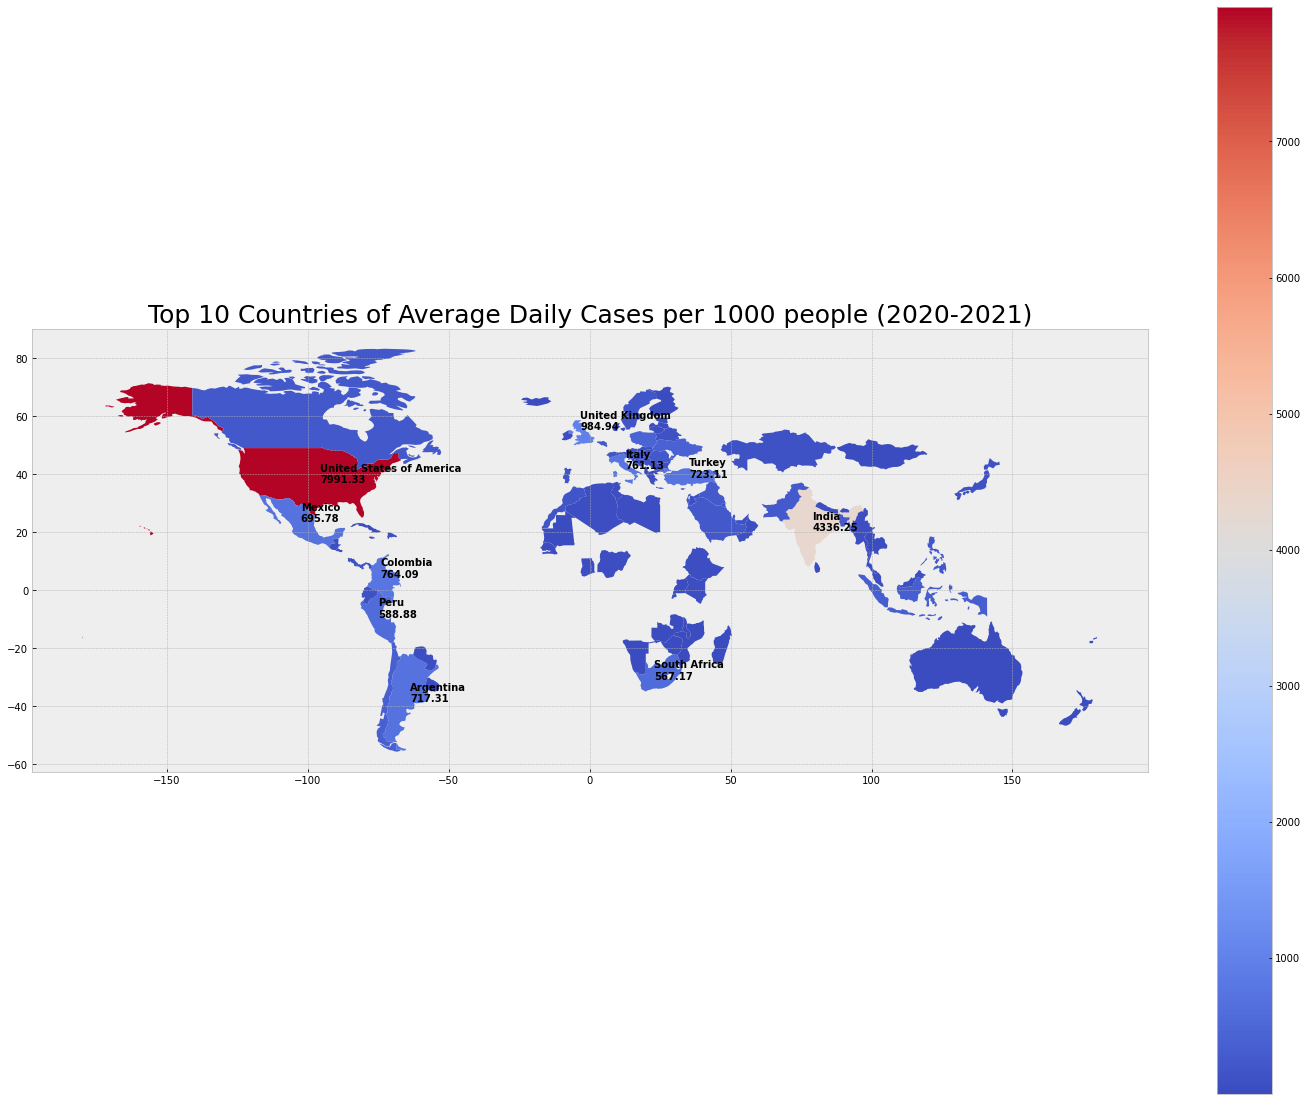

In [94]:
# plot test world map 
mergecases.plot(column='AverageCasesper1000',
           figsize=(25, 20),
           legend=True,cmap='coolwarm',
           missing_kwds={'color': 'lightgrey'})
plt.title('Top 10 Countries of Average Daily Cases per 1000 people (2020-2021)',fontsize=25)
# add countries names and numbers 
for i in range(0,10):
    plt.text(float(mergecases.Longitude[i]),float(mergecases.Latitude[i]),"{}\n{}".format(mergecases.name[i],round(mergecases.AverageCasesper1000[i],2)),size=10, fontweight = "bold")
plt.show()

### Visualisation: World Map of Average Deaths

In [95]:
sql9 = """SELECT daily.CODE, daily.Entity, AVG(daily.Deaths_per_1000) AS [AverageDeathsper1000], country.Latitude, country.Longitude FROM daily
LEFT JOIN country ON country.id=daily.id
GROUP BY daily.Entity;"""
data9 = pd.read_sql(sql9, conn)

In [96]:
data9

CODE         Entity  AverageDeathsper1000  Latitude  Longitude
0     ALB        Albania              0.484203     41.15      20.17
1     DZA        Algeria              1.547579     28.03       1.66
2     ARG      Argentina             18.499059    -38.42     -63.62
3     ARM        Armenia              1.260818     40.07      45.04
4     AUS      Australia              0.511164    -25.27     133.78
..    ...            ...                   ...       ...        ...
99    USA  United States            199.648847     37.09     -95.71
100   URY        Uruguay              0.108917    -32.52     -55.77
101  None        Vietnam              0.032737     14.06     108.28
102   ZMB         Zambia              0.289664    -13.13      27.85
103   ZWE       Zimbabwe              0.287020    -19.02      29.15

[104 rows x 5 columns]

In [97]:
# make a geometry object from Lat, Long
geodeaths = gpd.points_from_xy(data9.Longitude, data9.Latitude) 
# give the geometry to geopandas together with c
gcdeaths = gpd.GeoDataFrame(data9, geometry=geodeaths)         
gcdeaths.head()

CODE     Entity  AverageDeathsper1000  Latitude  Longitude  \
0  ALB    Albania              0.484203     41.15      20.17   
1  DZA    Algeria              1.547579     28.03       1.66   
2  ARG  Argentina             18.499059    -38.42     -63.62   
3  ARM    Armenia              1.260818     40.07      45.04   
4  AUS  Australia              0.511164    -25.27     133.78   

                      geometry  
0    POINT (20.17000 41.15000)  
1     POINT (1.66000 28.03000)  
2  POINT (-63.62000 -38.42000)  
3    POINT (45.04000 40.07000)  
4  POINT (133.78000 -25.27000)

In [98]:
# Merging datasets for visualisation
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world.columns=['pop_est', 'continent', 'name', 'CODE', 'gdp_md_est', 'geometry']  # Renaming iso_a3 column to CODE columns will match in both datasets

mergedeaths = pd.merge(world, gcdeaths, on='CODE')
mergedeaths = mergedeaths.rename(columns = {"geometry_x": "geometry"})
mergedeaths = mergedeaths.drop(columns = ['geometry_y'])
mergedeaths = mergedeaths.sort_values(by='AverageDeathsper1000', ascending=False)
mergedeaths = mergedeaths.reset_index()

In [99]:
mergedeaths.head()

index     pop_est      continent                      name CODE  \
0      2   326625791  North America  United States of America  USA   
1     44  1281935911           Asia                     India  IND   
2     10   124574795  North America                    Mexico  MEX   
3     75    64769452         Europe            United Kingdom  GBR   
4     73    62137802         Europe                     Italy  ITA   

   gdp_md_est                                           geometry  \
0  18560000.0  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...   
1   8721000.0  POLYGON ((97.32711 28.26158, 97.40256 27.88254...   
2   2307000.0  POLYGON ((-117.12776 32.53534, -115.99135 32.6...   
3   2788000.0  MULTIPOLYGON (((-6.19788 53.86757, -6.95373 54...   
4   2221000.0  MULTIPOLYGON (((10.44270 46.89355, 11.04856 46...   

           Entity  AverageDeathsper1000  Latitude  Longitude  
0   United States            199.648847     37.09     -95.71  
1           India             73.937054     20.59      78.96  
2          Mexico             69.878856     23.63    -102.55  
3  United Kingdom             48.610239     55.38      -3.44  
4           Italy             42.075636     41.87      12.57

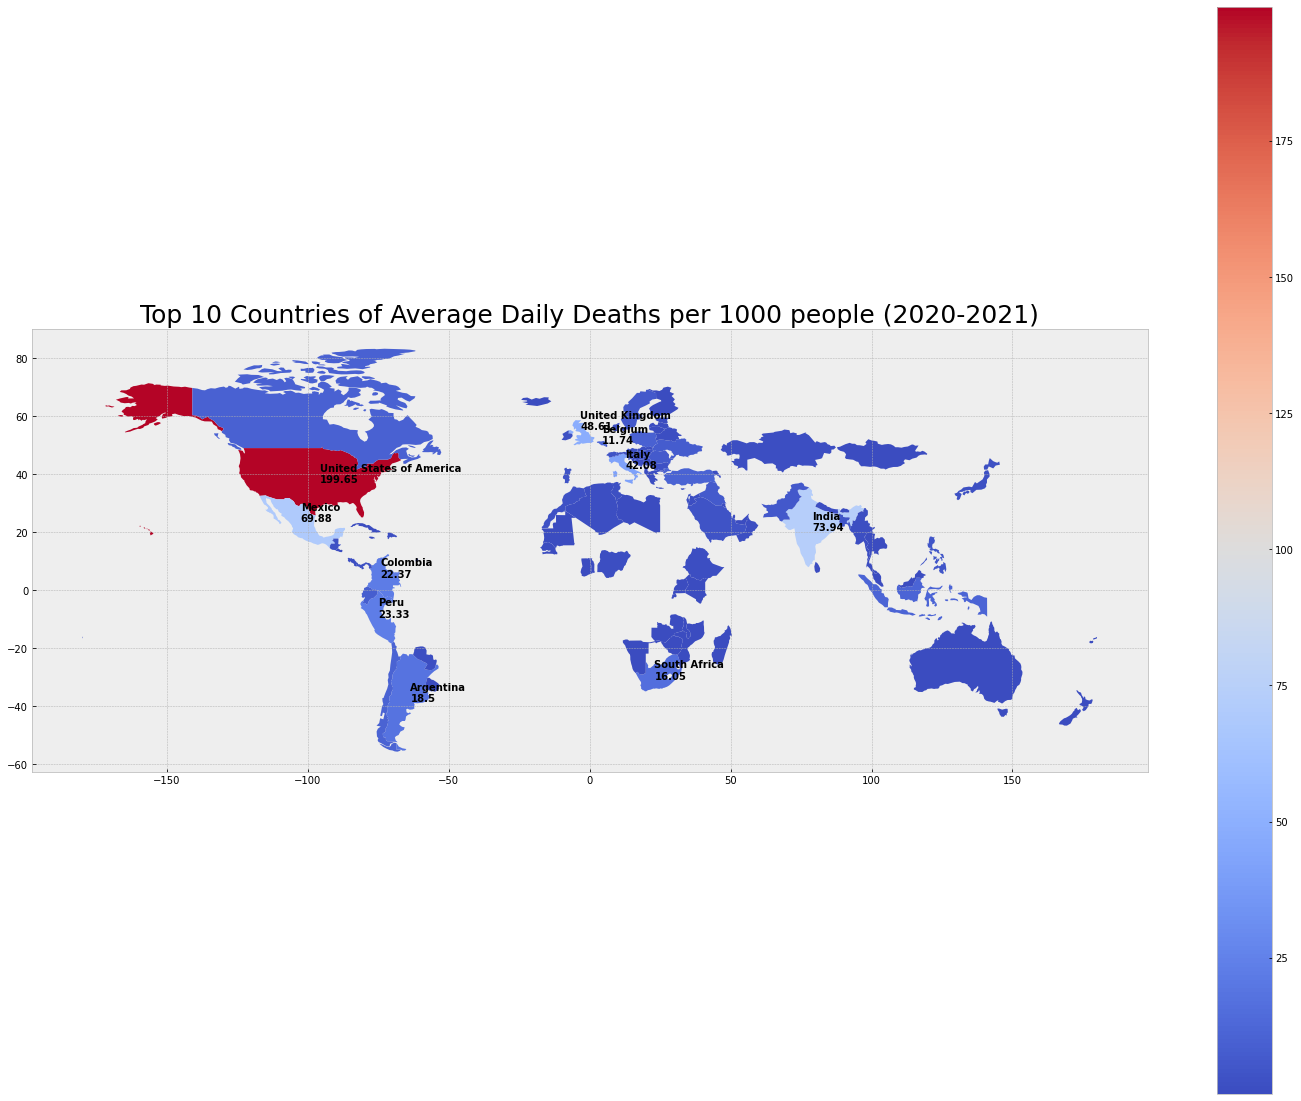

In [101]:
# plot test world map 
mergedeaths.plot(column='AverageDeathsper1000',
           figsize=(25, 20),
           legend=True,cmap='coolwarm')
plt.title('Top 10 Countries of Average Daily Deaths per 1000 people (2020-2021)',fontsize=25)
# add countries names and numbers 
for i in range(0,10):
    plt.text(float(mergedeaths.Longitude[i]),float(mergedeaths.Latitude[i]),"{}\n{}".format(mergedeaths.name[i],round(mergedeaths.AverageDeathsper1000[i],2)),size=10, fontweight = "bold")
plt.show()